# Life Expectency Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')

In [3]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

## Data Overview

In [4]:
data.columns = data.columns.str.strip()

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.sample(3)

Country  Year      Status  Life expectancy  Adult Mortality  \
398   Bulgaria  2001   Developed             71.6             16.0   
236    Belarus  2003  Developing             67.7            253.0   
1037    Greece  2004  Developing             79.2             81.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
398               1    10.72               25.062629         93.0        8   
236               1    11.17               23.835786         56.0       21   
1037              0     9.56              287.612452         92.0        1   

       BMI  under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
398   57.5                  1   94.0               7.23        94.0       0.1   
236   55.8                  1   53.0               6.59         5.0       0.1   
1037  59.9                  1   95.0               8.30        95.0       0.1   

               GDP  Population  thinness  1-19 years  thinness 5-9 years  \
398    1764.973870     89142.0                   2.4                 2.5   
236    1819.525644   9796749.0                   2.5                 2.6   
1037  21955.149000   1955141.0                   0.8                 0.8   

      Income composition of resources  Schooling  
398                             0.713       12.9  
236                             0.695       13.9  
1037                            0.830       15.3

In [7]:
data.columns = data.columns.str.strip()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

- Most of the Columns are Numerical. 
- Only two columns are Categorical.
- Some of the columns contain Null Values.
- No issues of Incorrect Datatype.

In [9]:
print(f"\nThe Dataset Contains {data.shape[0]} rows and {data.shape[1]} columns\n")


The Dataset Contains 2938 rows and 22 columns



In [10]:
print("\nDataset has Null Values: ",data.isnull().sum().any(),"\n")


Dataset has Null Values:  True 



In [11]:
print("\nDataset has Duplicated Values: ",data.duplicated().sum().any(),"\n")


Dataset has Duplicated Values:  False 



In [12]:
data.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

- **Life Expectancy** does contain Outliers as 75% of the Moratality is under 228 and Max value is 723
- Similarly in **Infanct Deaths** column. 75% of the deaths are under 22 and the max is 1800. A clear cut presence of outliers.
- **Alcohal** and **Percentage Expenditure** columns have outliers as well.
- **Hepatitese B** has outliers on the lower side...
- **Measles**, **Under-five deaths**, **Total Expenditure**, **GDP**, **thinness 1-19 years**, **thinness 5-9 years** have outliers...
- Columns **HIV/AIDS** has a clear cut outlier as 75% of the data is below 0.800 and the Max value is 50.66

## Data Analysis

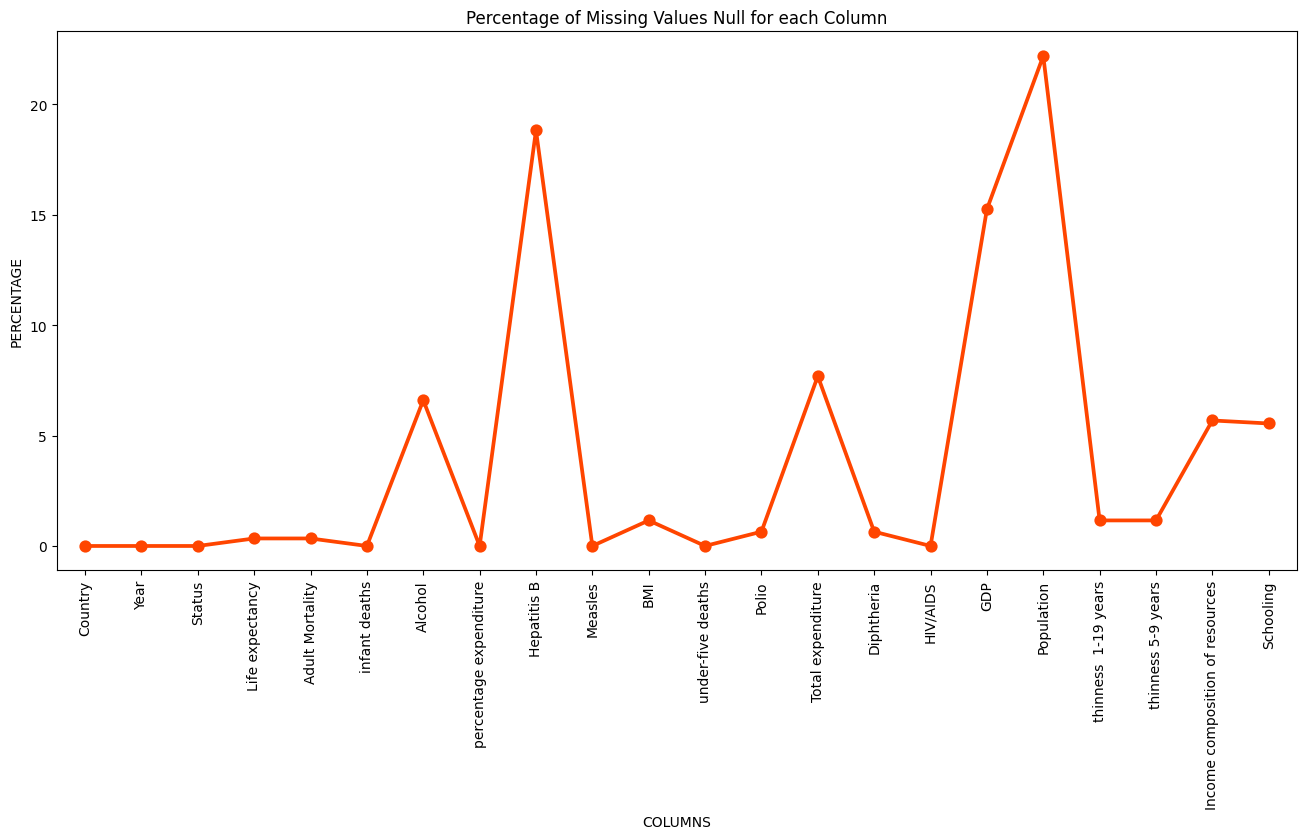

In [13]:
missing = pd.DataFrame(data.isnull().sum() * 100 / data.shape[0]).reset_index()

plt.figure(figsize=(16, 7))
ax = sns.pointplot(data=missing,x = 'index' ,y=0, color='orangered')

plt.title('Percentage of Missing Values Null for each Column')
plt.xlabel('COLUMNS')
plt.ylabel('PERCENTAGE')
plt.xticks(rotation = 90)
plt.show()


- We can see Column 'Population' has the most number of Missing Values followed by HIV/AIDS and Hepatites B. There are a lot of outliers present in the data. We'll be imputing the null values by various methods ( Mean, KNN Imputation, Mode ) and droping the Null values as well. We will then check the affect on the distribution for each techinique and then chooose the ideal one for Handling Missing Data.

- Life Expectancy in this case contains considerably small number of missing values. As it will be our Output Column for Model building we will not be filling the missing values in this column and drop the rows that has missing values in Life Expectancy column

In [14]:
data_EDA = data.copy()

In [15]:
data_EDA.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [16]:
data_EDA.dropna(subset = ['Adult Mortality','Polio','Life expectancy','BMI','Diphtheria','thinness 5-9 years',
                          'thinness  1-19 years','thinness 5-9 years'
                          ], inplace=True)

These Columns have null values of only 0.6% and 1% of the actual Dataset and can be dropped

In [17]:
data_EDA.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            175
percentage expenditure               0
Hepatitis B                        525
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                  212
Diphtheria                           0
HIV/AIDS                             0
GDP                                435
Population                         644
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    160
Schooling                          160
dtype: int64

### Data Cleaning  (  Imputation  )

In [18]:
###     ------------                 Using KNN IMPUTER technique             -----------------


from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)


cols_to_impute =   ['Alcohol', 'Hepatitis B','Total expenditure','GDP', 'Population','Income composition of resources', 'Schooling']


imputed = knn.fit_transform(data_EDA[cols_to_impute])


data_EDA_imp = data_EDA.copy()
data_EDA_imp[cols_to_impute] = imputed

In [19]:
#   -----------------        Creating the Function to check the affect of different imputation techniques...

def impute_effect(col):
    plt.figure(figsize=(14,8))

    plt.subplot(2,2,1)
    sns.kdeplot(data_EDA[col])
    sns.kdeplot(data_EDA.dropna(subset=col)[col])
    plt.title("Droping Method")

    plt.subplot(2,2,2)
    sns.kdeplot(data_EDA[col])
    sns.kdeplot(data_EDA.fillna(data_EDA[col].mean())[col])
    plt.title("Filling Missing Values with Mean")

    plt.subplot(2,2,3)
    sns.kdeplot(data_EDA[col])
    sns.kdeplot(data_EDA_imp[col])
    plt.title("Filling Missing Values with KNN Imputer")

    plt.subplot(2,2,4)
    sns.kdeplot(data_EDA[col])
    sns.kdeplot(data_EDA.fillna(data_EDA[col].mode()[0])[col])
    plt.title("Filling Missing Values with Mode")

    plt.tight_layout()

In [20]:
cols_to_impute

['Alcohol',
 'Hepatitis B',
 'Total expenditure',
 'GDP',
 'Population',
 'Income composition of resources',
 'Schooling']

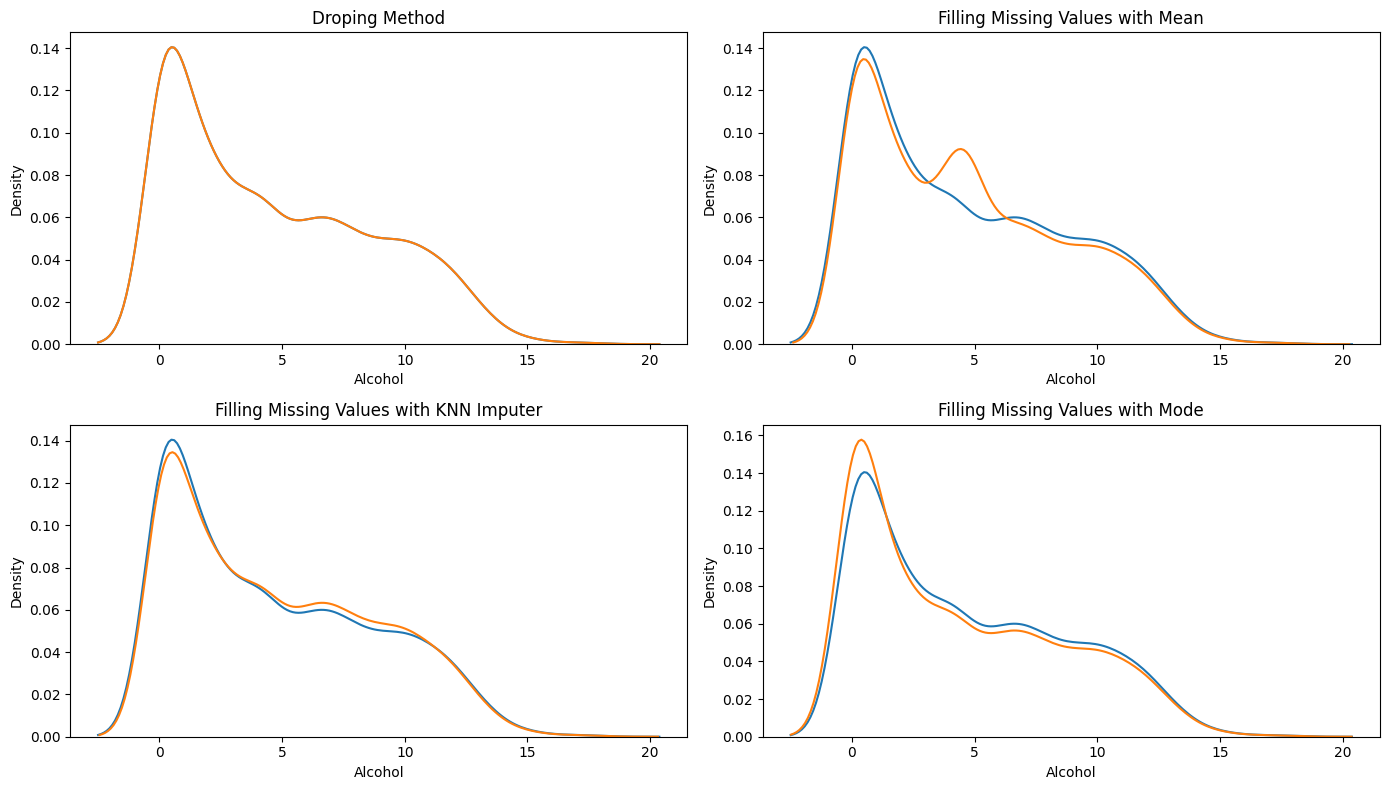

In [21]:
impute_effect('Alcohol')

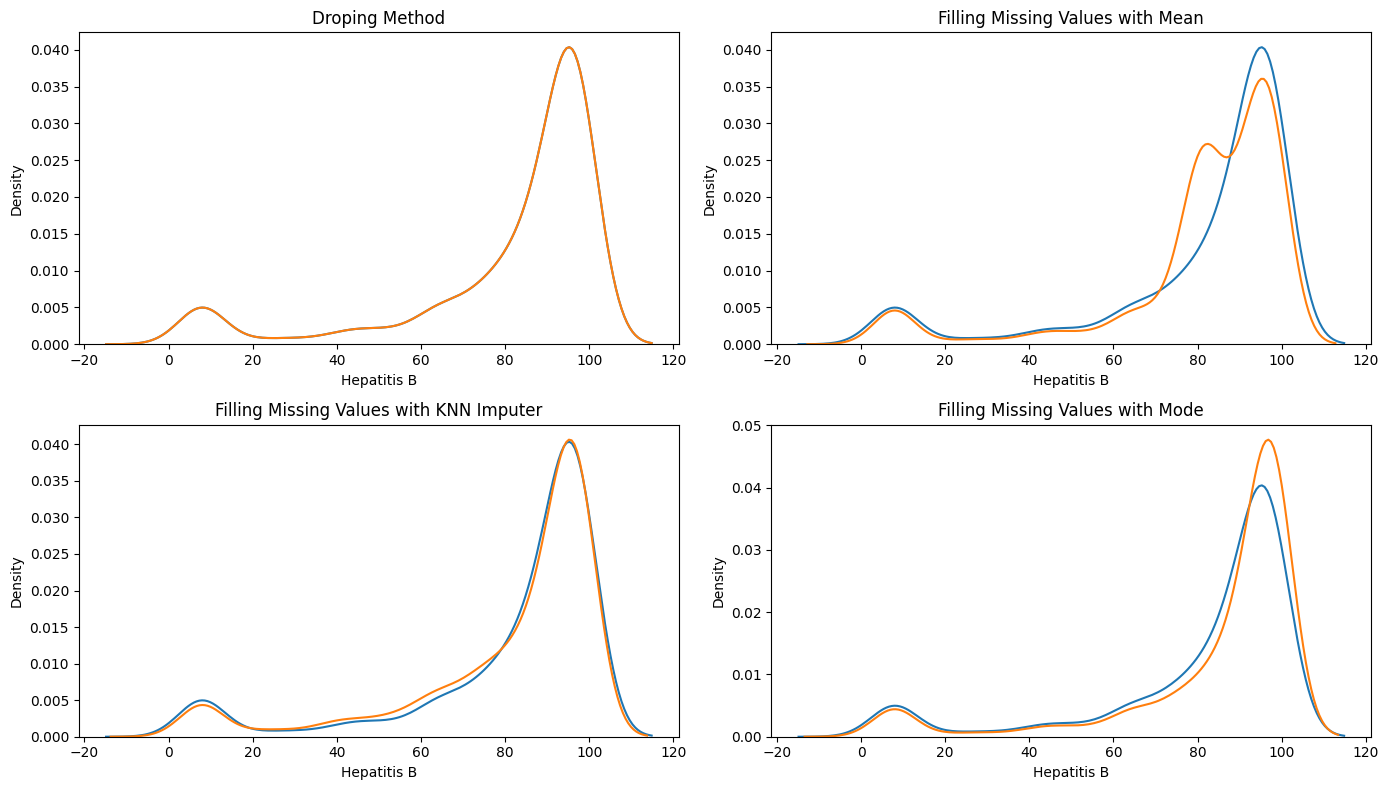

In [22]:
impute_effect('Hepatitis B')

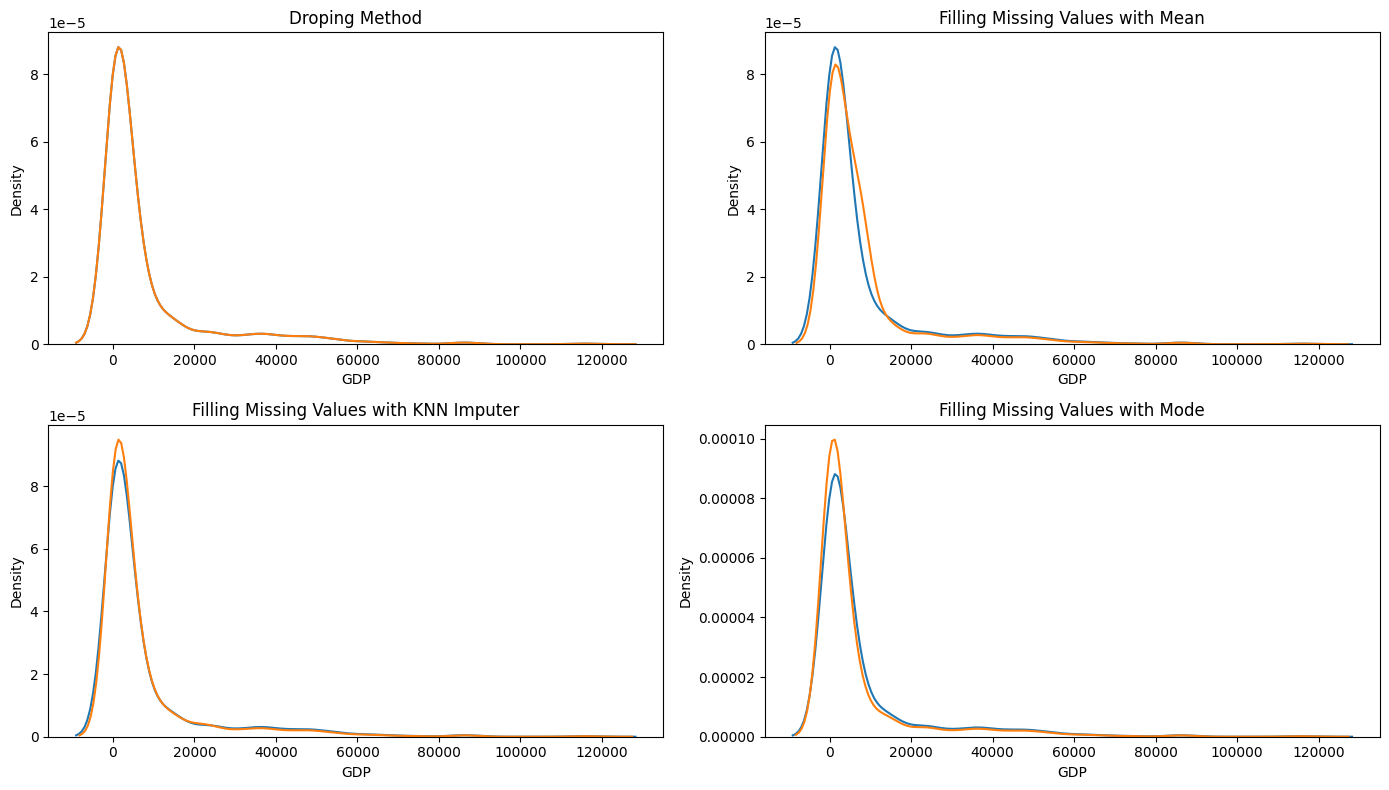

In [23]:
impute_effect('GDP')

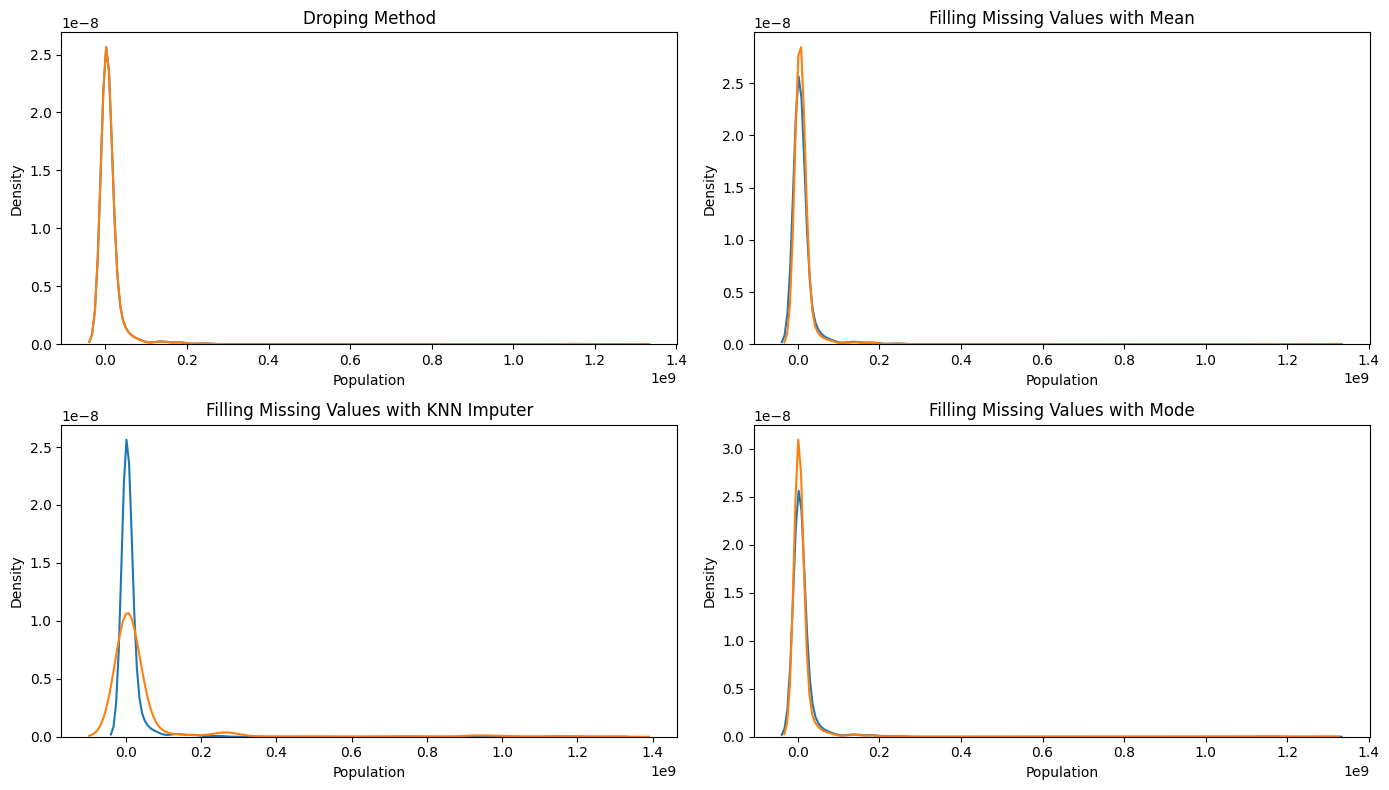

In [24]:
impute_effect('Population')

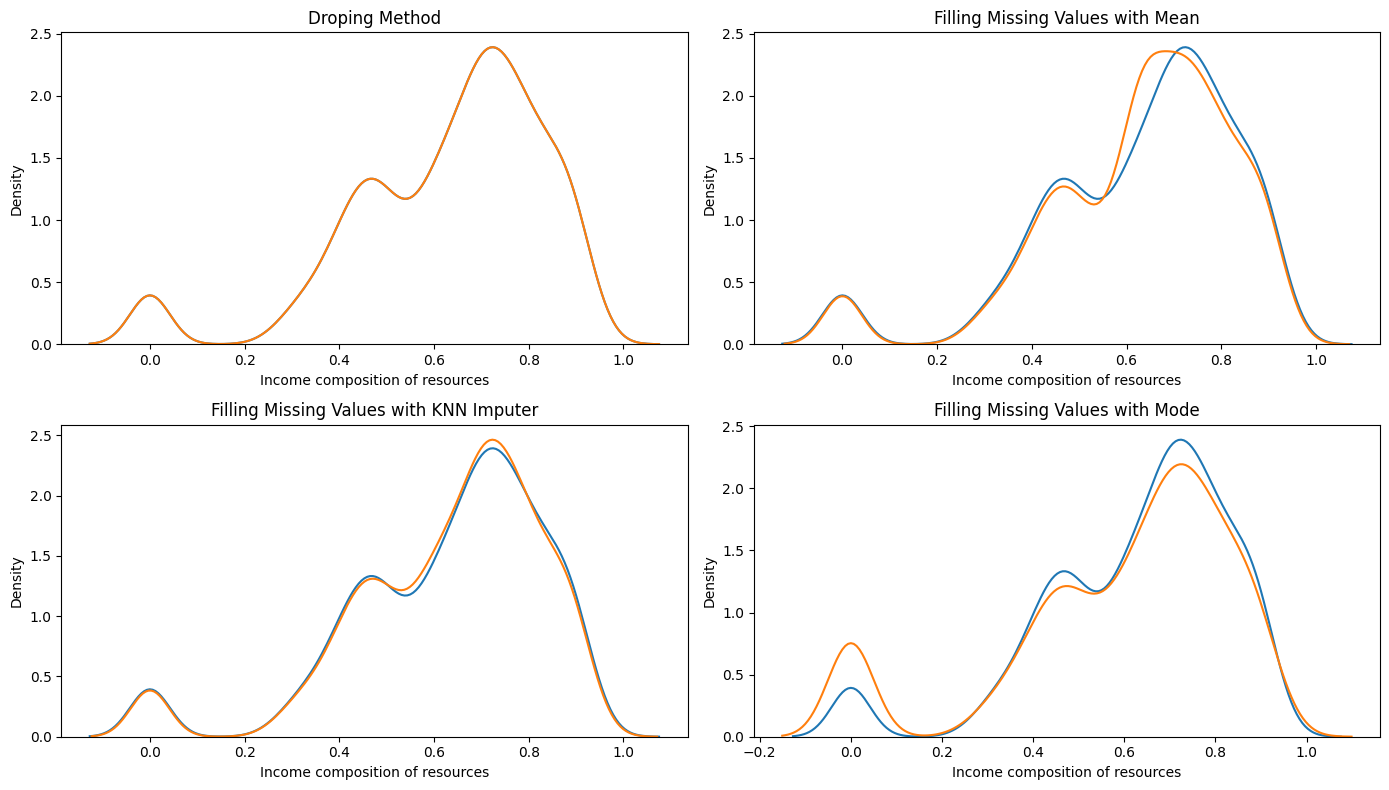

In [25]:
impute_effect('Income composition of resources')

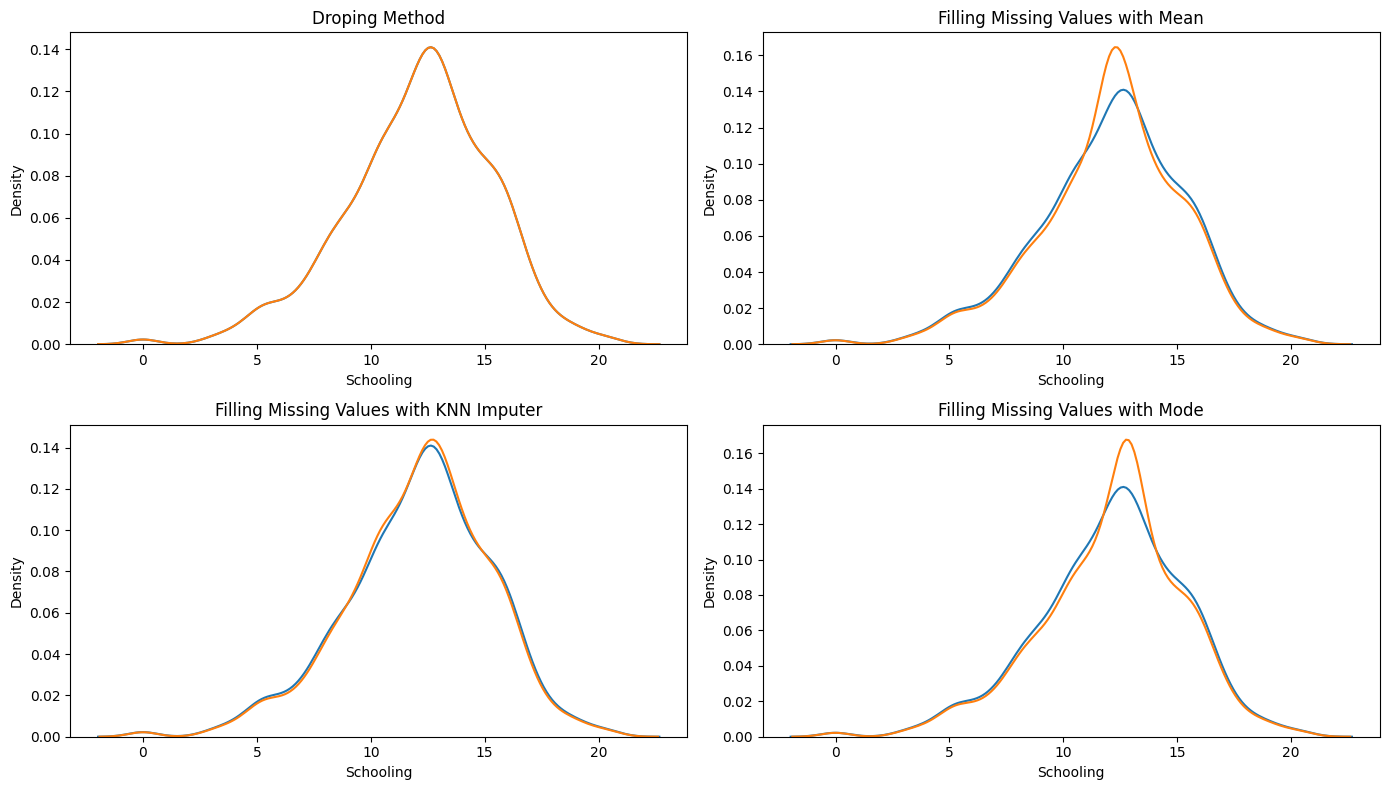

In [26]:
impute_effect('Schooling')

As we can see KNN is performing well with most of the columns except the 'Population' column.
- We'll be using Mean imputation in case of Population Column

Imputing Missing values in Population column with Mean

In [27]:

data_EDA['Population'] = data_EDA['Population'].fillna(data_EDA['Population'].mean())



Imputing other Missing Values with KNN Imputer

In [28]:
KNN = KNNImputer(n_neighbors=5)

data_EDA[cols_to_impute]  =  KNN.fit_transform(data_EDA[cols_to_impute])



Checking Null Values again...!

In [29]:
data_EDA.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

No Null Values in the Dataset...

### Univaraite Analysis

<Axes: xlabel='infant deaths', ylabel='Density'>

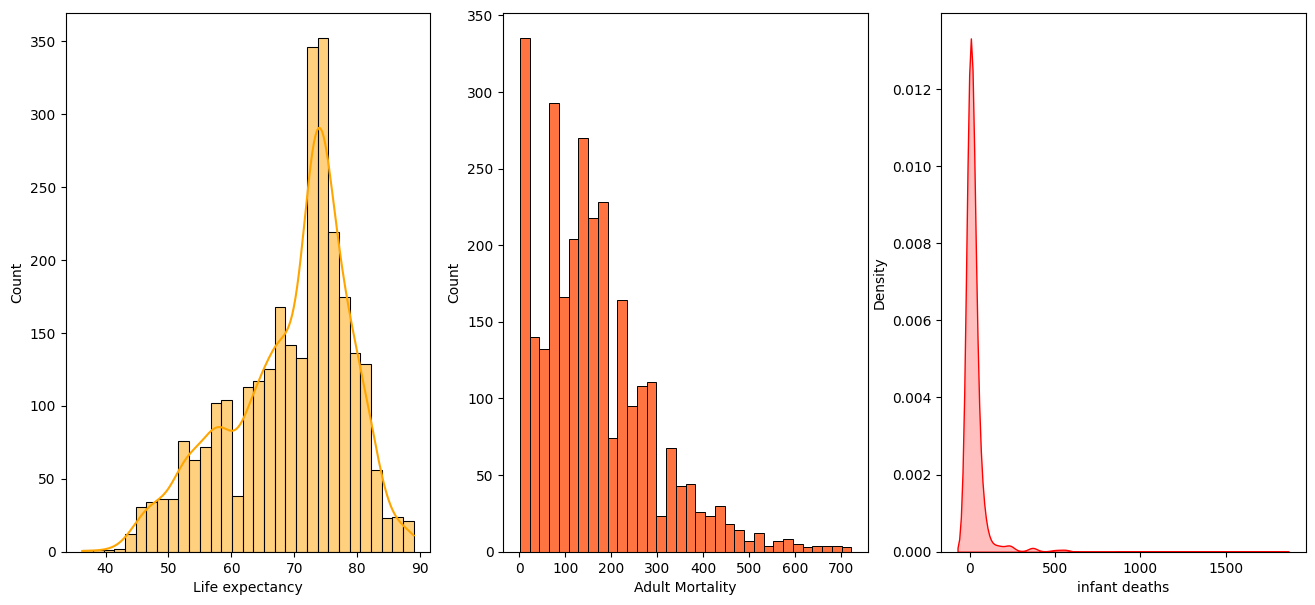

In [30]:

plt.figure(figsize=(16, 7))

plt.subplot(1,3,1)
sns.histplot(data_EDA['Life expectancy'], kde=True, color='orange')

plt.subplot(1,3,2)
sns.histplot(data_EDA['Adult Mortality'], color='orangered')

plt.subplot(1,3,3)
sns.kdeplot(data_EDA['infant deaths'],color='red', shade = True)


- Majority of the People are expected to live between 70 - 75 years, if they survive all the Diseases that a new infant can face.


- We can see from the above graph that fewer countries have the most amount of Adult Mortality or Deaths per 1000 


- In case of the Infant Deaths, the death rate is almost 0 in most of the Countries but reach to around 1800 in some countries


<Axes: xlabel='HIV/AIDS', ylabel='Density'>

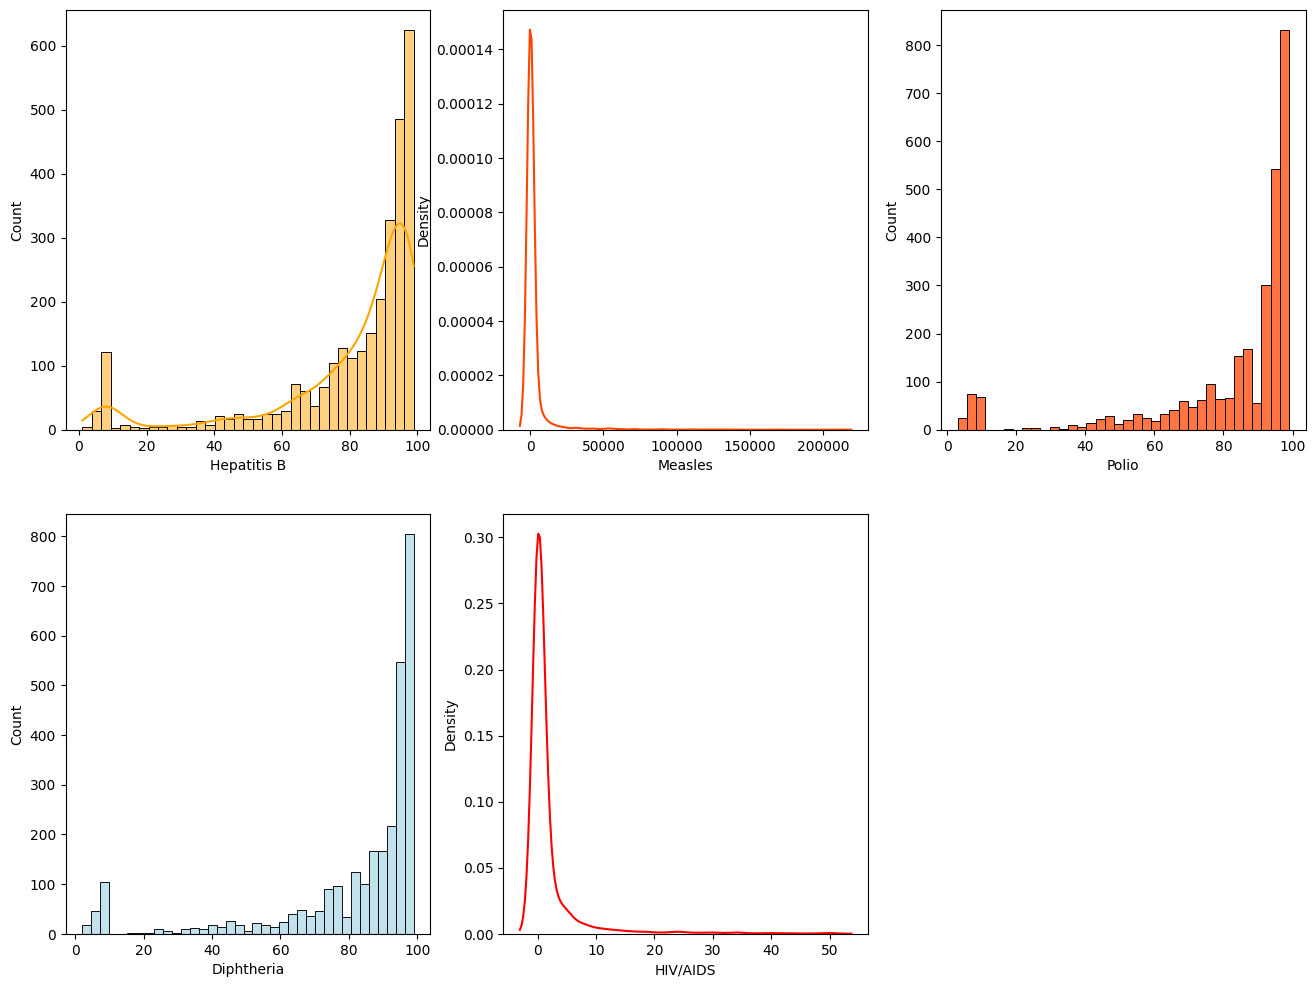

In [31]:

diseases_cols = data_EDA[['Hepatitis B','Measles','Polio','Diphtheria','HIV/AIDS']]


plt.figure(figsize=(16, 12))

plt.subplot(2,3,1)
sns.histplot(data_EDA['Hepatitis B'], kde=True, color='orange')

plt.subplot(2,3,2)
sns.kdeplot(data_EDA['Measles'], color='orangered')

plt.subplot(2,3,3)
sns.histplot(data_EDA['Polio'],color='orangered')

plt.subplot(2,3,4)
sns.histplot(data_EDA['Diphtheria'],color='lightblue')


plt.subplot(2,3,5)
sns.kdeplot(data_EDA['HIV/AIDS'], color='red')


- From above it is clear that disease like HIV/AIDS and Measles are less likely to occur but in some countries the rates of these are far exceeding especially in case of Measles the maximum is around 212000, possibly due to the over spread of this disease that Year.


- Other Diseses like Hepatites B, Polio and Diphtheria are suffered by most of the countries with around 80-100 cases on average per year.  

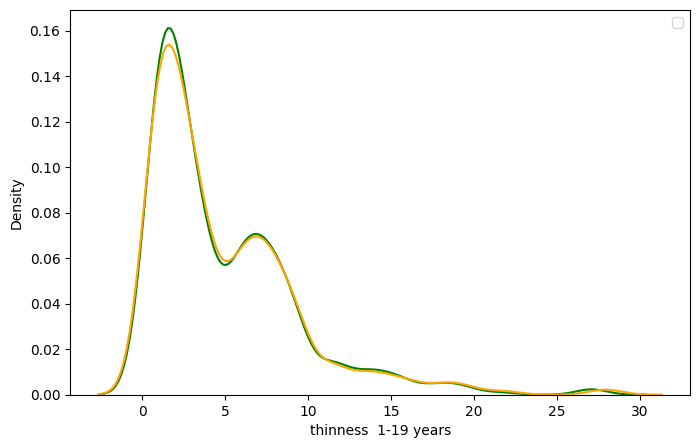

In [32]:
plt.figure(figsize=(8, 5))

sns.kdeplot(data_EDA['thinness  1-19 years'], color = 'green')
sns.kdeplot(data_EDA['thinness 5-9 years'], color = 'orange')
plt.legend()
plt.show()

- 10% of the People from different countries are more likely to be underweight.

“In most countries, around 5–10% of children aged 5–9 years are underweight, as the distribution of thinness peaks in that range.”

<Axes: xlabel='Schooling', ylabel='Count'>

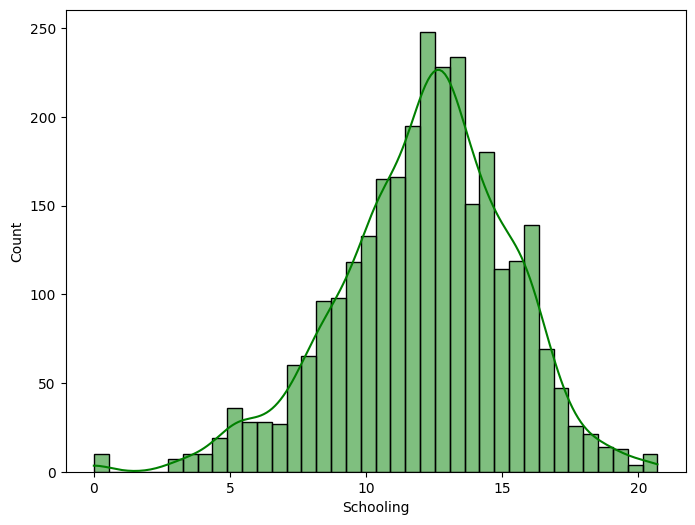

In [33]:
plt.figure(figsize=(8, 6))

sns.histplot(data_EDA['Schooling'], color = 'green', kde=True)

- People above 25 have received Schooling almost around 10 - 15 years in average across most of the countries — which typically corresponds to completing high school or some college. It is visible in the graph that, the individuals in some Countries have not received any Schooling at all...

In [34]:
data.head(3)

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0             62     0.01               71.279624         65.0     1154  19.1   
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9

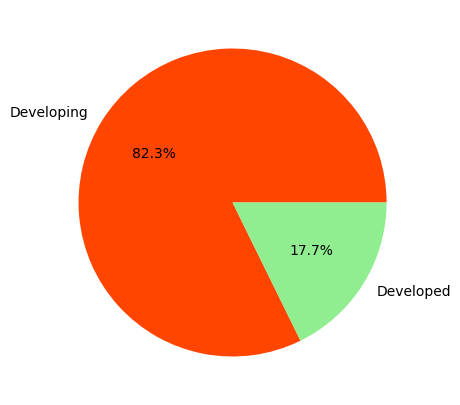

In [35]:
plt.figure(figsize=(8, 5))

plt.pie(
    x=data_EDA['Status'].value_counts(),
    labels=data_EDA['Status'].value_counts().index,
    colors=['orangered','lightgreen'],
    autopct='%1.1f%%'

)
plt.show()

82% of the Countries among 193 total countries are in Developing phase and around 17% among them are already Developed Countries.

<Axes: ylabel='Count'>

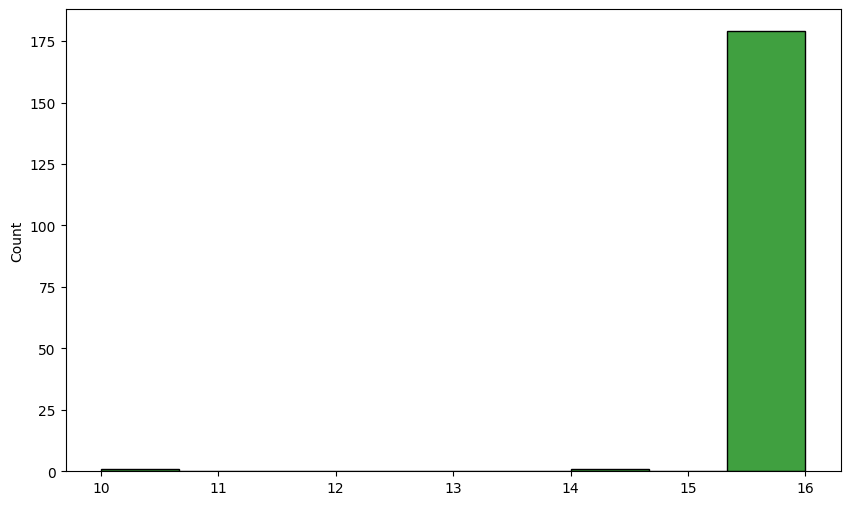

In [36]:
plt.figure(figsize=(10,6))

sns.histplot(data_EDA['Country'].value_counts().values, color='green')

Almost all the countriesa are listed 16 times in the dataset, and very few of them are listed only 10 and 14... time.

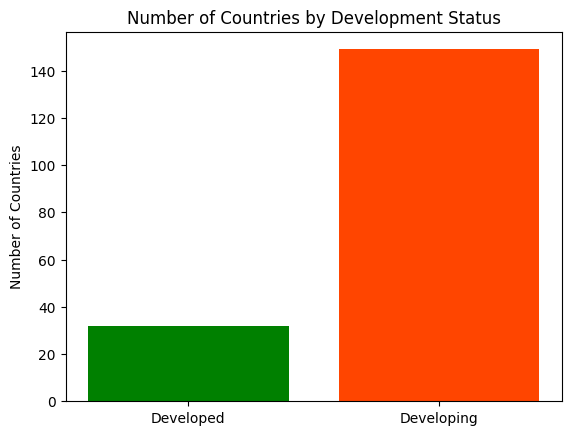

In [37]:
Countries_Status = pd.DataFrame(data_EDA.groupby('Country')['Status'].unique()).reset_index()

Developing_Countries = list(Countries_Status[Countries_Status['Status'].apply(lambda x: 'Developing' in x)]['Country'])
Developed_Countries = list(Countries_Status[Countries_Status['Status'].apply(lambda x: 'Developed' in x)].Country)


plt.bar(['Developed','Developing'],[len(Developed_Countries),len(Developing_Countries)], color = ['green','orangered'])

plt.title('Number of Countries by Development Status')
plt.ylabel('Number of Countries')
plt.show()


As we can see the number of Countries that are Developed are very low in number compared to the Countries that are Developing...

### Bi-Varitae and Multi-Variate Analysis

In [38]:
data_EDA.drop(columns=['Year'])

Country      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  Developing             65.0            263.0   
1     Afghanistan  Developing             59.9            271.0   
2     Afghanistan  Developing             59.9            268.0   
3     Afghanistan  Developing             59.5            272.0   
4     Afghanistan  Developing             59.2            275.0   
...           ...         ...              ...              ...   
2933     Zimbabwe  Developing             44.3            723.0   
2934     Zimbabwe  Developing             44.5            715.0   
2935     Zimbabwe  Developing             44.8             73.0   
2936     Zimbabwe  Developing             45.3            686.0   
2937     Zimbabwe  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

       BMI  under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0     19.1                 83    6.0               8.16        65.0       0.1   
1     18.6                 86   58.0               8.18        62.0       0.1   
2     18.1                 89   62.0               8.13        64.0       0.1   
3     17.6                 93   67.0               8.52        67.0       0.1   
4     17.2                 97   68.0               7.87        68.0       0.1   
...    ...                ...    ...                ...         ...       ...   
2933  27.1                 42   67.0               7.13        65.0      33.6   
2934  26.7                 41    7.0               6.52        68.0      36.7   
2935  26.3                 40   73.0               6.53        71.0      39.8   
2936  25.9                 39   76.0               6.16        75.0      42.1   
2937  25.5                 39   78.0               7.10        78.0      43.5   

             GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0     584.259210  33736494.0                  17.2                17.3   
1     612.696514    327582.0                  17.5                17.5   
2     631.744976  31731688.0                  17.7                17.7   
3     669.959000   3696958.0                  17.9                18.0   
4      63.537231   2978599.0                  18.2                18.2   
...          ...         ...                   ...                 ...   
2933  454.366654  12777511.0                   9.4                 9.4   
2934  453.351155  12633897.0                   9.8                 9.9   
2935   57.348340    125525.0                   1.2                 1.3   
2936  548.587312  12366165.0                   1.6                 1.7   
2937  547.358878  12222251.0                  11.0                11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2 

In [39]:
data_EDA.sample(4)

Country  Year      Status  Life expectancy  \
451                         Cabo Verde  2012  Developing             72.7   
2000                          Paraguay  2006  Developing             72.3   
478                           Cambodia  2001  Developing             58.5   
309   Bolivia (Plurinational State of)  2010  Developing             68.7   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
451             121.0              0     0.01               33.558890   
2000            161.0              3     5.61               26.180724   
478             273.0             25     1.71               27.689711   
309              22.0              9     3.95                0.000000   

      Hepatitis B  Measles   BMI  under-five deaths  Polio  Total expenditure  \
451          94.0        0  29.0                  0   94.0               4.61   
2000         92.0        0  43.5                  4   98.0               6.43   
478          89.6     3761  12.4                 33   59.0               5.70   
309          91.0        0  49.3                 12    9.0               5.44   

      Diphtheria  HIV/AIDS           GDP    Population  thinness  1-19 years  \
451         94.0       0.3    348.482762  5.139790e+05                   7.1   
2000        98.0       0.2    189.715390  5.882796e+06                   2.2   
478          6.0       2.2    321.226340  1.242473e+06                  11.6   
309         91.0       0.2  12848.391939  1.283534e+07                   1.2   

      thinness 5-9 years  Income composition of resources  Schooling  
451                  7.1                            0.636       13.2  
2000                 2.2                            0.648       12.1  
478                 11.8                            0.412        7.6  
309                  1.1                            0.643       13.8

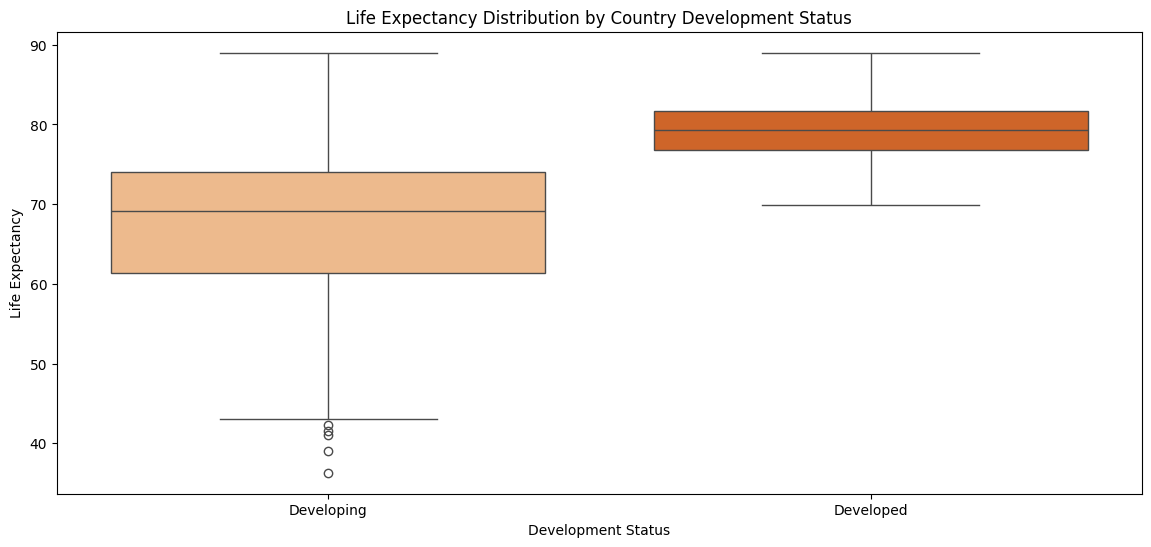

Status   count       mean       std   min   25%    50%     75%   max
0   Developed   512.0  79.197852  3.930942  69.9  76.8  79.25  81.700  89.0
1  Developing  2376.0  67.227146  8.992261  36.3  61.4  69.10  74.025  89.0

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.boxplot(x='Status', y='Life expectancy', data=data_EDA, palette='Oranges')
plt.title('Life Expectancy Distribution by Country Development Status')
plt.xlabel('Development Status')
plt.ylabel('Life Expectancy')
plt.show()

data_EDA.groupby('Status')['Life expectancy'].describe().reset_index()

Life expectancy in case of the Developed Countries is clearly higher and moratlity rate is very high in Developing countries. The reason could be poor medical services.


            'Adult Mortality and Infant Deaths Distribution by Country Development Status'


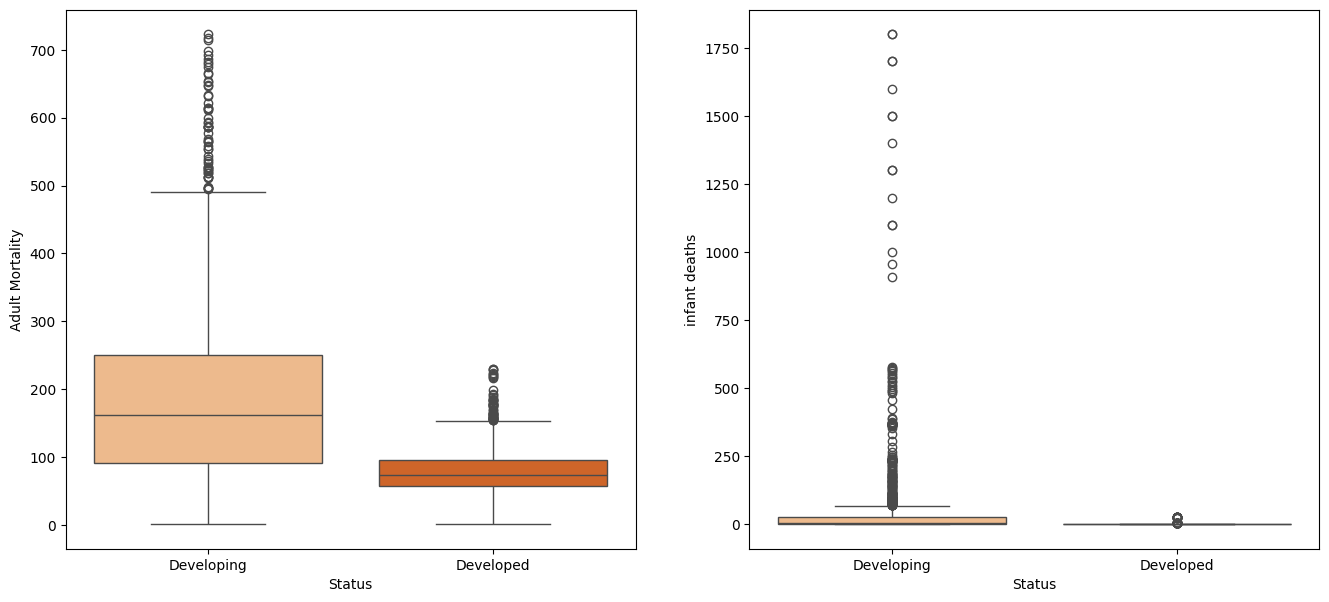

In [41]:
plt.figure(figsize=(25, 7))

plt.subplot(1,3,1)
sns.boxplot(x='Status', y='Adult Mortality', data=data_EDA, palette='Oranges')



plt.subplot(1,3,2)
sns.boxplot(x='Status', y='infant deaths', data=data_EDA, palette='Oranges')


print("\n            'Adult Mortality and Infant Deaths Distribution by Country Development Status'")

Adult Moratality and Infant Deaths are also very low in Developed Countries as compared to the Developing Countries

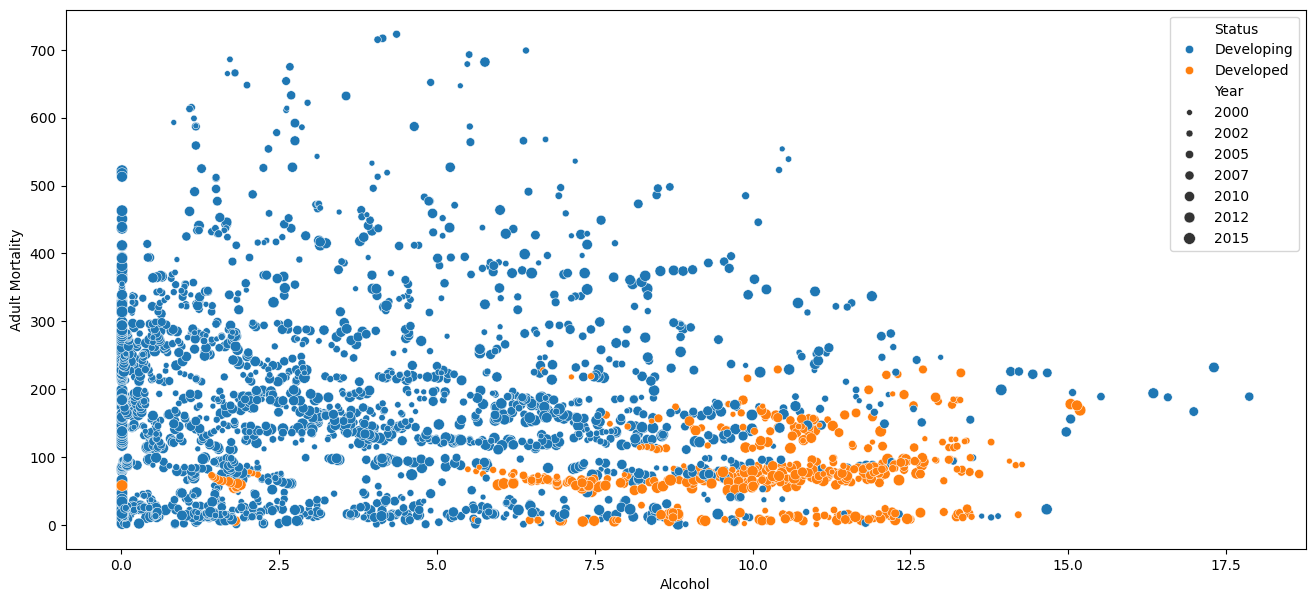

In [42]:
plt.figure(figsize=(16,7))
sns.scatterplot(data=data, x= 'Alcohol', y ='Adult Mortality', hue='Status', size='Year' )
plt.show()


- The Alcolhal consuption in case of the Developed Countries is more as compared to the Developing Countries.
- The Adult Mortality does not depend much on the Alohal consuption as the graph is not positively corelated.
- Also we can see a recent surge in alcohal consuption in case of the Developing countries. Probably from 2007 onwards.
- Adult Deaths in recent Year 2012 to 2015 are much higher probably due to outbreak of some disease.


In [43]:
data_EDA.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


 ------------------------------   Total Cases of Diseases in each Year ------------------------------


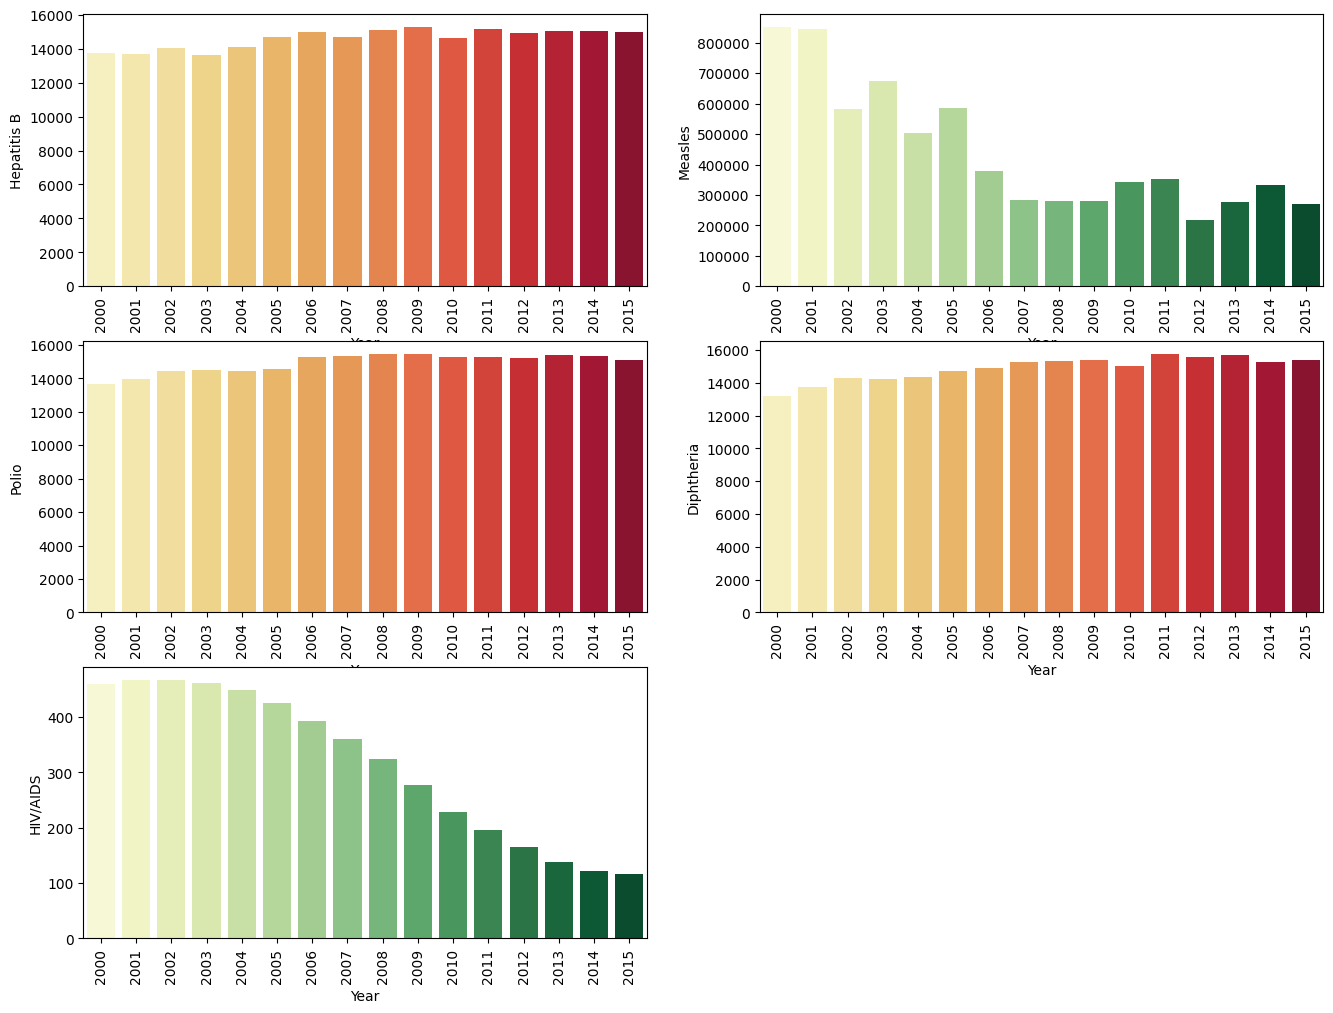

In [44]:
plt.figure(figsize=(16,12))

print(f"\n {"-"*30}   Total Cases of Diseases in each Year {"-"*30}")

plt.subplot(3,2,1)
sns.barplot(data_EDA.groupby('Year')['Hepatitis B'].sum(), palette='YlOrRd')
plt.xticks(rotation=90)

plt.subplot(3,2,2)
sns.barplot(data_EDA.groupby('Year')['Measles'].sum(), palette='YlGn')
plt.xticks(rotation=90)


plt.subplot(3,2,3)
sns.barplot(data_EDA.groupby('Year')['Polio'].sum(), palette='YlOrRd')
plt.xticks(rotation=90)

plt.subplot(3,2,4)
sns.barplot(data_EDA.groupby('Year')['Diphtheria'].sum(), palette='YlOrRd')
plt.xticks(rotation=90)

plt.subplot(3,2,5)
sns.barplot(data_EDA.groupby('Year')['HIV/AIDS'].sum(), palette='YlGn')
plt.xticks(rotation=90)
plt.show()



In case of Measles and HIV/AIds, the cases have been decreasing significantly but other diseases like Hepatitis B, Polio and Diphtheria are constant over the Years and have not shown any decrease.

In [45]:
'Hepatitis B','Measles', 'Polio','Diphtheria', 'HIV/AIDS'

('Hepatitis B', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS')


 ------------------------------   Top 20 Countries Vs Diseases  ------------------------------


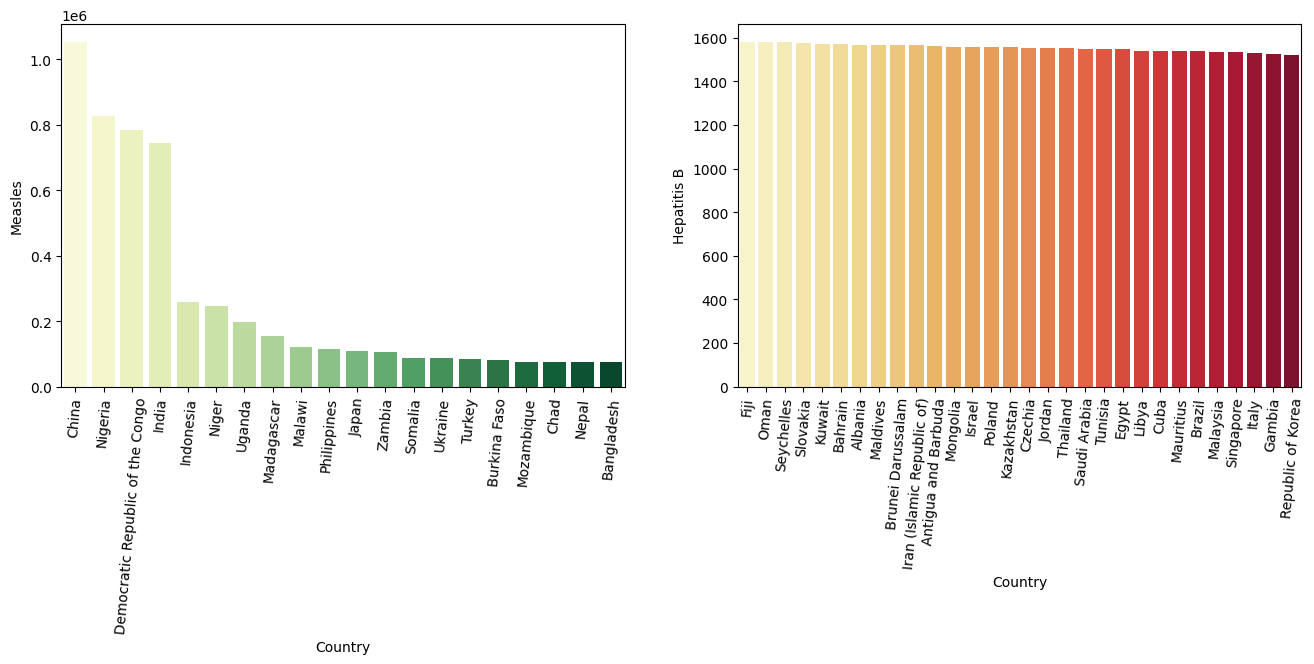

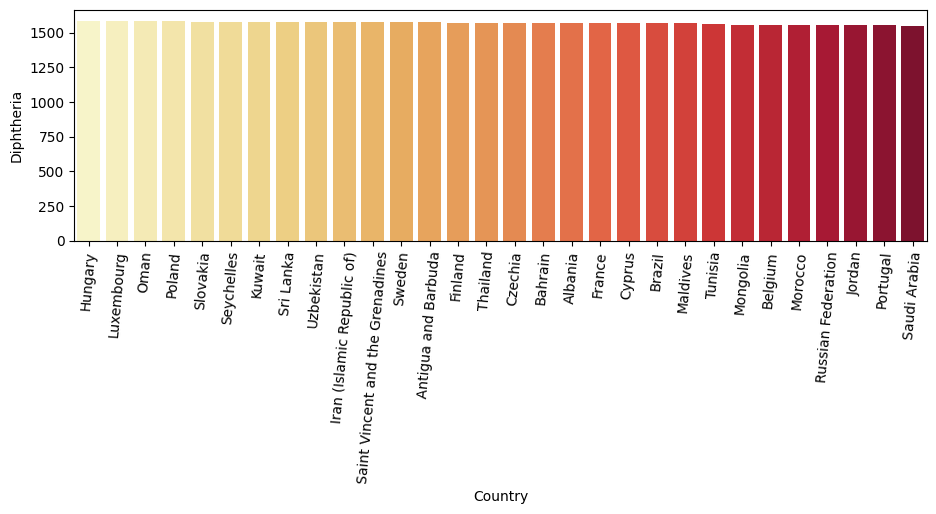

In [46]:
Measles_by_country_df = pd.DataFrame(data_EDA.groupby('Country')['Measles'].sum()).reset_index()
Hepatitis_B_by_country_df = pd.DataFrame(data_EDA.groupby('Country')['Hepatitis B'].sum()).reset_index()
Polio_by_country_df = pd.DataFrame(data_EDA.groupby('Country')['Polio'].sum()).reset_index()
Diphtheria_by_country_df = pd.DataFrame(data_EDA.groupby('Country')['Diphtheria'].sum()).reset_index()
HIV_AIDS_by_country_df = pd.DataFrame(data_EDA.groupby('Country')['HIV/AIDS'].sum()).reset_index()

Top_countries_Measles = Measles_by_country_df.sort_values(by='Measles',ascending=False).head(20)
Top_countries_Hepatitis_B = Hepatitis_B_by_country_df.sort_values(by='Hepatitis B',ascending=False).head(30)
Top_countries_Polio = Polio_by_country_df.sort_values(by='Polio',ascending=False).head(30)
Top_countries_Diphtheria = Diphtheria_by_country_df.sort_values(by='Diphtheria',ascending=False).head(30)
Top_countries_HIV_AIDS = HIV_AIDS_by_country_df.sort_values(by='HIV/AIDS',ascending=False).head(20)




plt.figure(figsize=(16,16))

print(f"\n {"-"*30}   Top 20 Countries Vs Diseases  {"-"*30}")

plt.subplot(3,2,1)
sns.barplot(data = Top_countries_Measles, x = 'Country', y = 'Measles', palette='YlGn')
plt.xticks(rotation=85)

plt.subplot(3,2,2)
sns.barplot(data = Top_countries_Hepatitis_B, x = 'Country', y = 'Hepatitis B', palette='YlOrRd')
plt.xticks(rotation=85)

plt.figure(figsize=(11,3))
sns.barplot(data = Top_countries_Diphtheria, x = 'Country', y = 'Diphtheria', palette='YlOrRd')
plt.xticks(rotation=85)





plt.show()



**China, India, Nigeria and Democratic Republic of Congo have highest number of Measles Cases.**

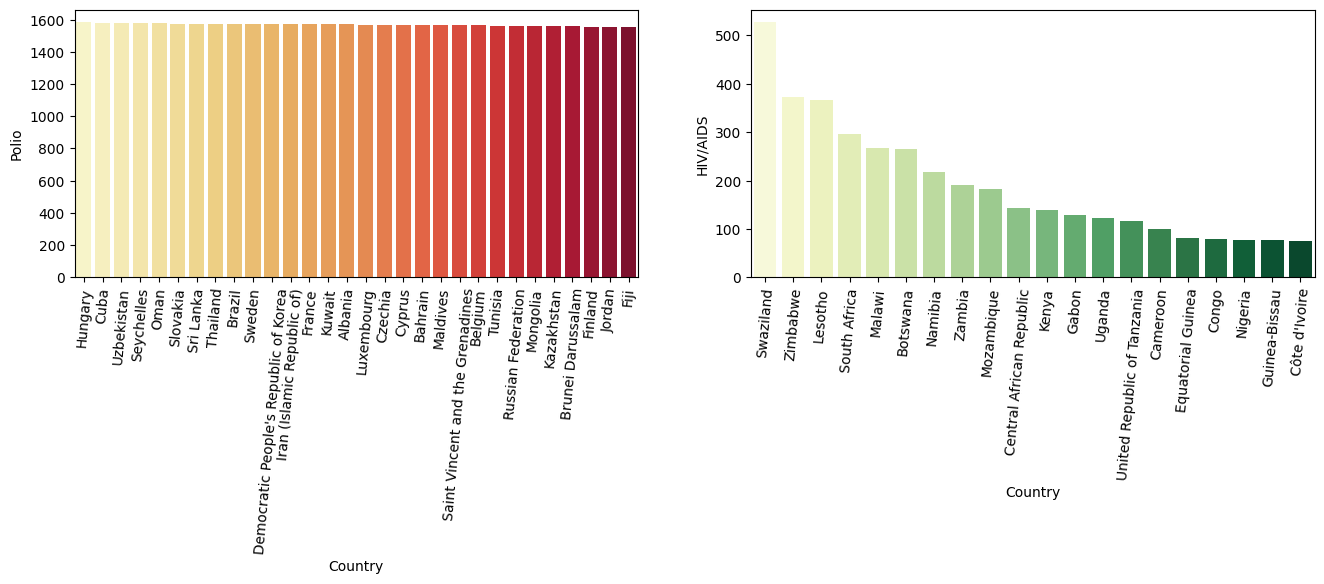

In [47]:
plt.figure(figsize=(16,16))

plt.subplot(4,2,3)
sns.barplot(data = Top_countries_Polio, x = 'Country', y = 'Polio', palette='YlOrRd')
plt.xticks(rotation=85)

plt.subplot(4,2,4)
sns.barplot(data = Top_countries_HIV_AIDS, x = 'Country', y = 'HIV/AIDS', palette='YlGn')
plt.xticks(rotation=85)



plt.show()

**In case of the HIV/AIDS cases, most number of cases are from the countries like Swaziland, Zimbabwe, Lesotho, South Afica, Malawi and Botswana.**

### Data Cleaning (  Outlier Datection and Removal  )

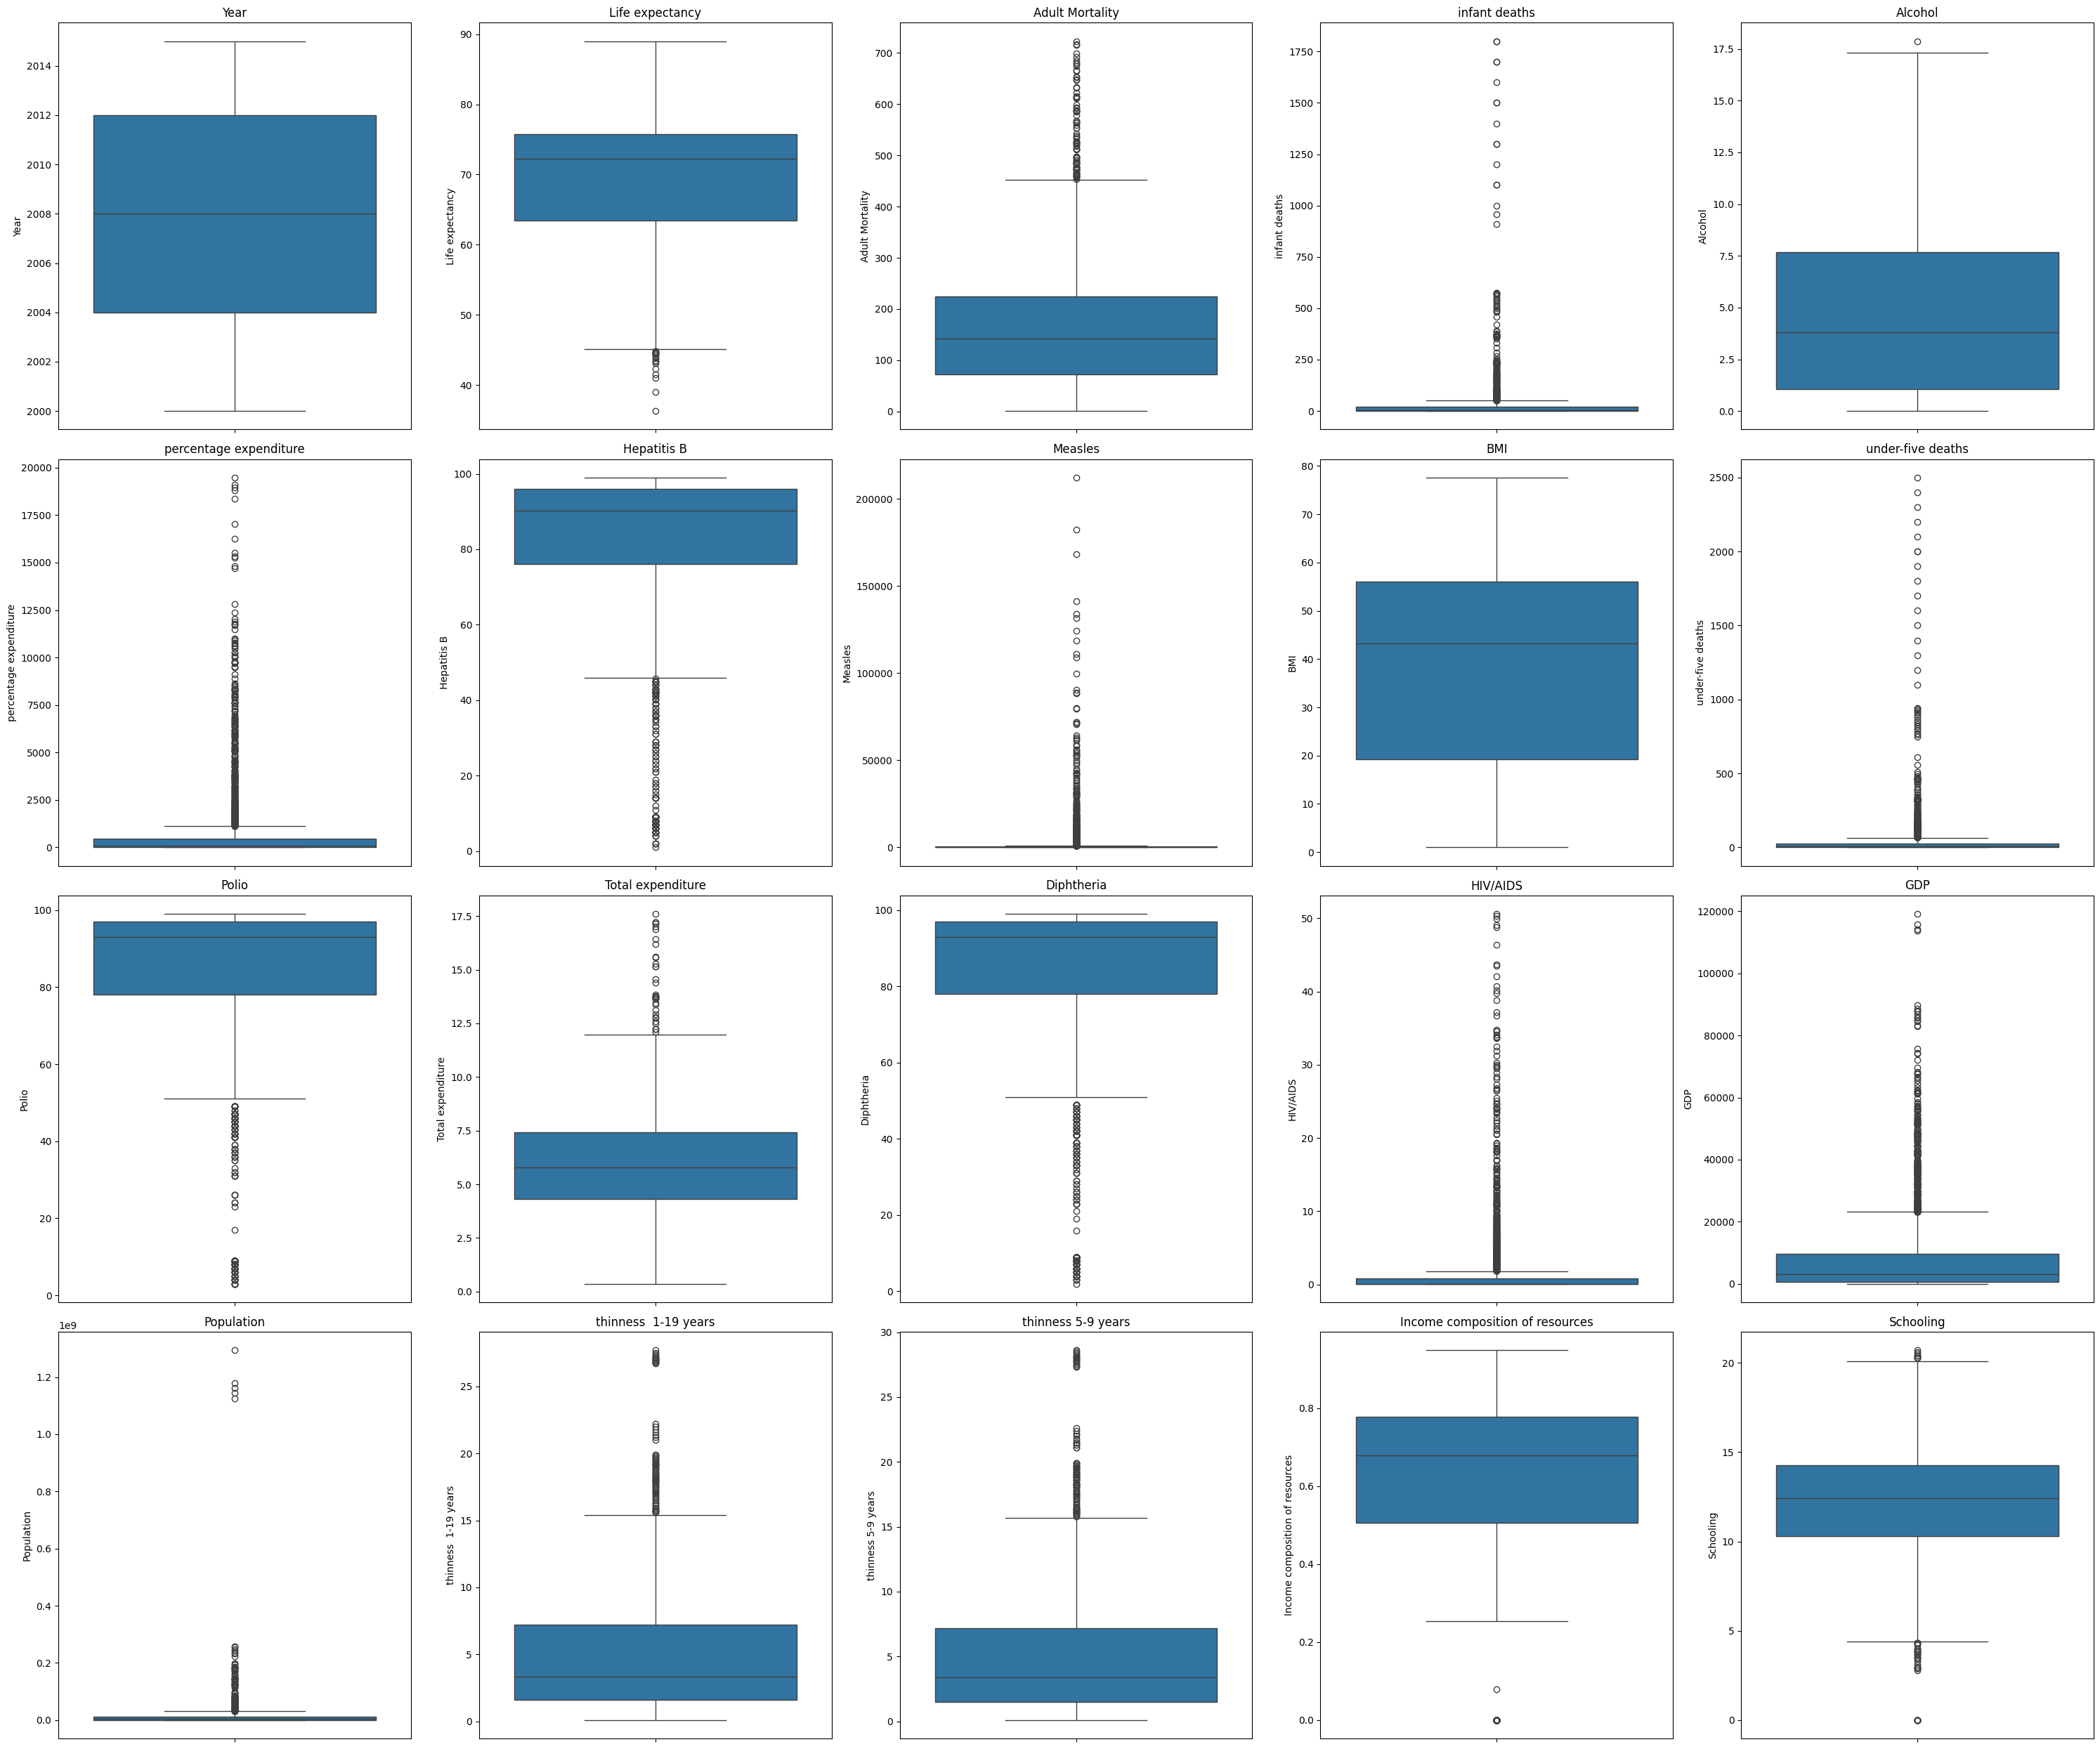

In [48]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,25))
index=0
ax=ax.flatten()


for col,value in data_EDA.select_dtypes(include='number').items():
    if index >= 24:
        break
    sns.boxplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

Except 'BMI' and 'Year', all of the other numerical columns contains Outliers...

We will check two techniques to handle the Outliers in the Data Set:
- Removing Them  ->  IQR Method
- Giving Values  ->  Capping Method

In [49]:
#           ----------     IQR Method    -----------


def IQR_outlier_removal (data,col):
    
    Q1 = np.quantile(data[col], 0.25)
    Q3 = np.quantile(data[col], 0.75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR


    return data[(data[col] <= upper_bound) & (data[col] >= lower_bound)]



In [50]:
#              ----------     Capping Method    -----------

def IQR_outlier_Capping (data,col):
    
    Q1 = np.quantile(data[col], 0.25)
    Q3 = np.quantile(data[col], 0.75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    
    data[col] = np.where(
    data[col]>upper_bound,
        upper_bound,
        np.where(
        data[col] < lower_bound,
            lower_bound,
            data[col]
        )
    )
    return data

In [51]:
print("\nShape of the data before Handling Outliers : ", data_EDA.shape)


Shape of the data before Handling Outliers :  (2888, 22)


In [52]:

outlier_columns = data_EDA.select_dtypes(include='number').drop(columns=['BMI','Year','Life expectancy']).columns

We'll keep the outliers in the "Life Expectancy" columns as it will be our output column and may contain output information that cannot be altered.

In [53]:
outlier_columns


Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles', 'under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [54]:
data_EDA_remove = data_EDA.copy()

data_EDA_cap = data_EDA.copy()



for col in outlier_columns:
    data_EDA_cap = IQR_outlier_Capping(data_EDA_cap,col)
    
    
for col in outlier_columns:
    data_EDA_remove = IQR_outlier_removal(data_EDA_remove,col)
    


In [55]:
print("\nData after Outlier Removal using IQR Technique: ", data_EDA_remove.shape)
print("\nData after Outlier Capping using Capping Method Technique: ", data_EDA_cap.shape)


Data after Outlier Removal using IQR Technique:  (719, 22)

Data after Outlier Capping using Capping Method Technique:  (2888, 22)


In case of Removal of the Outliers by IQR method we are loosing a lot of information but when doing capping we have a lot of information preserved. Let's see the affect on the graph

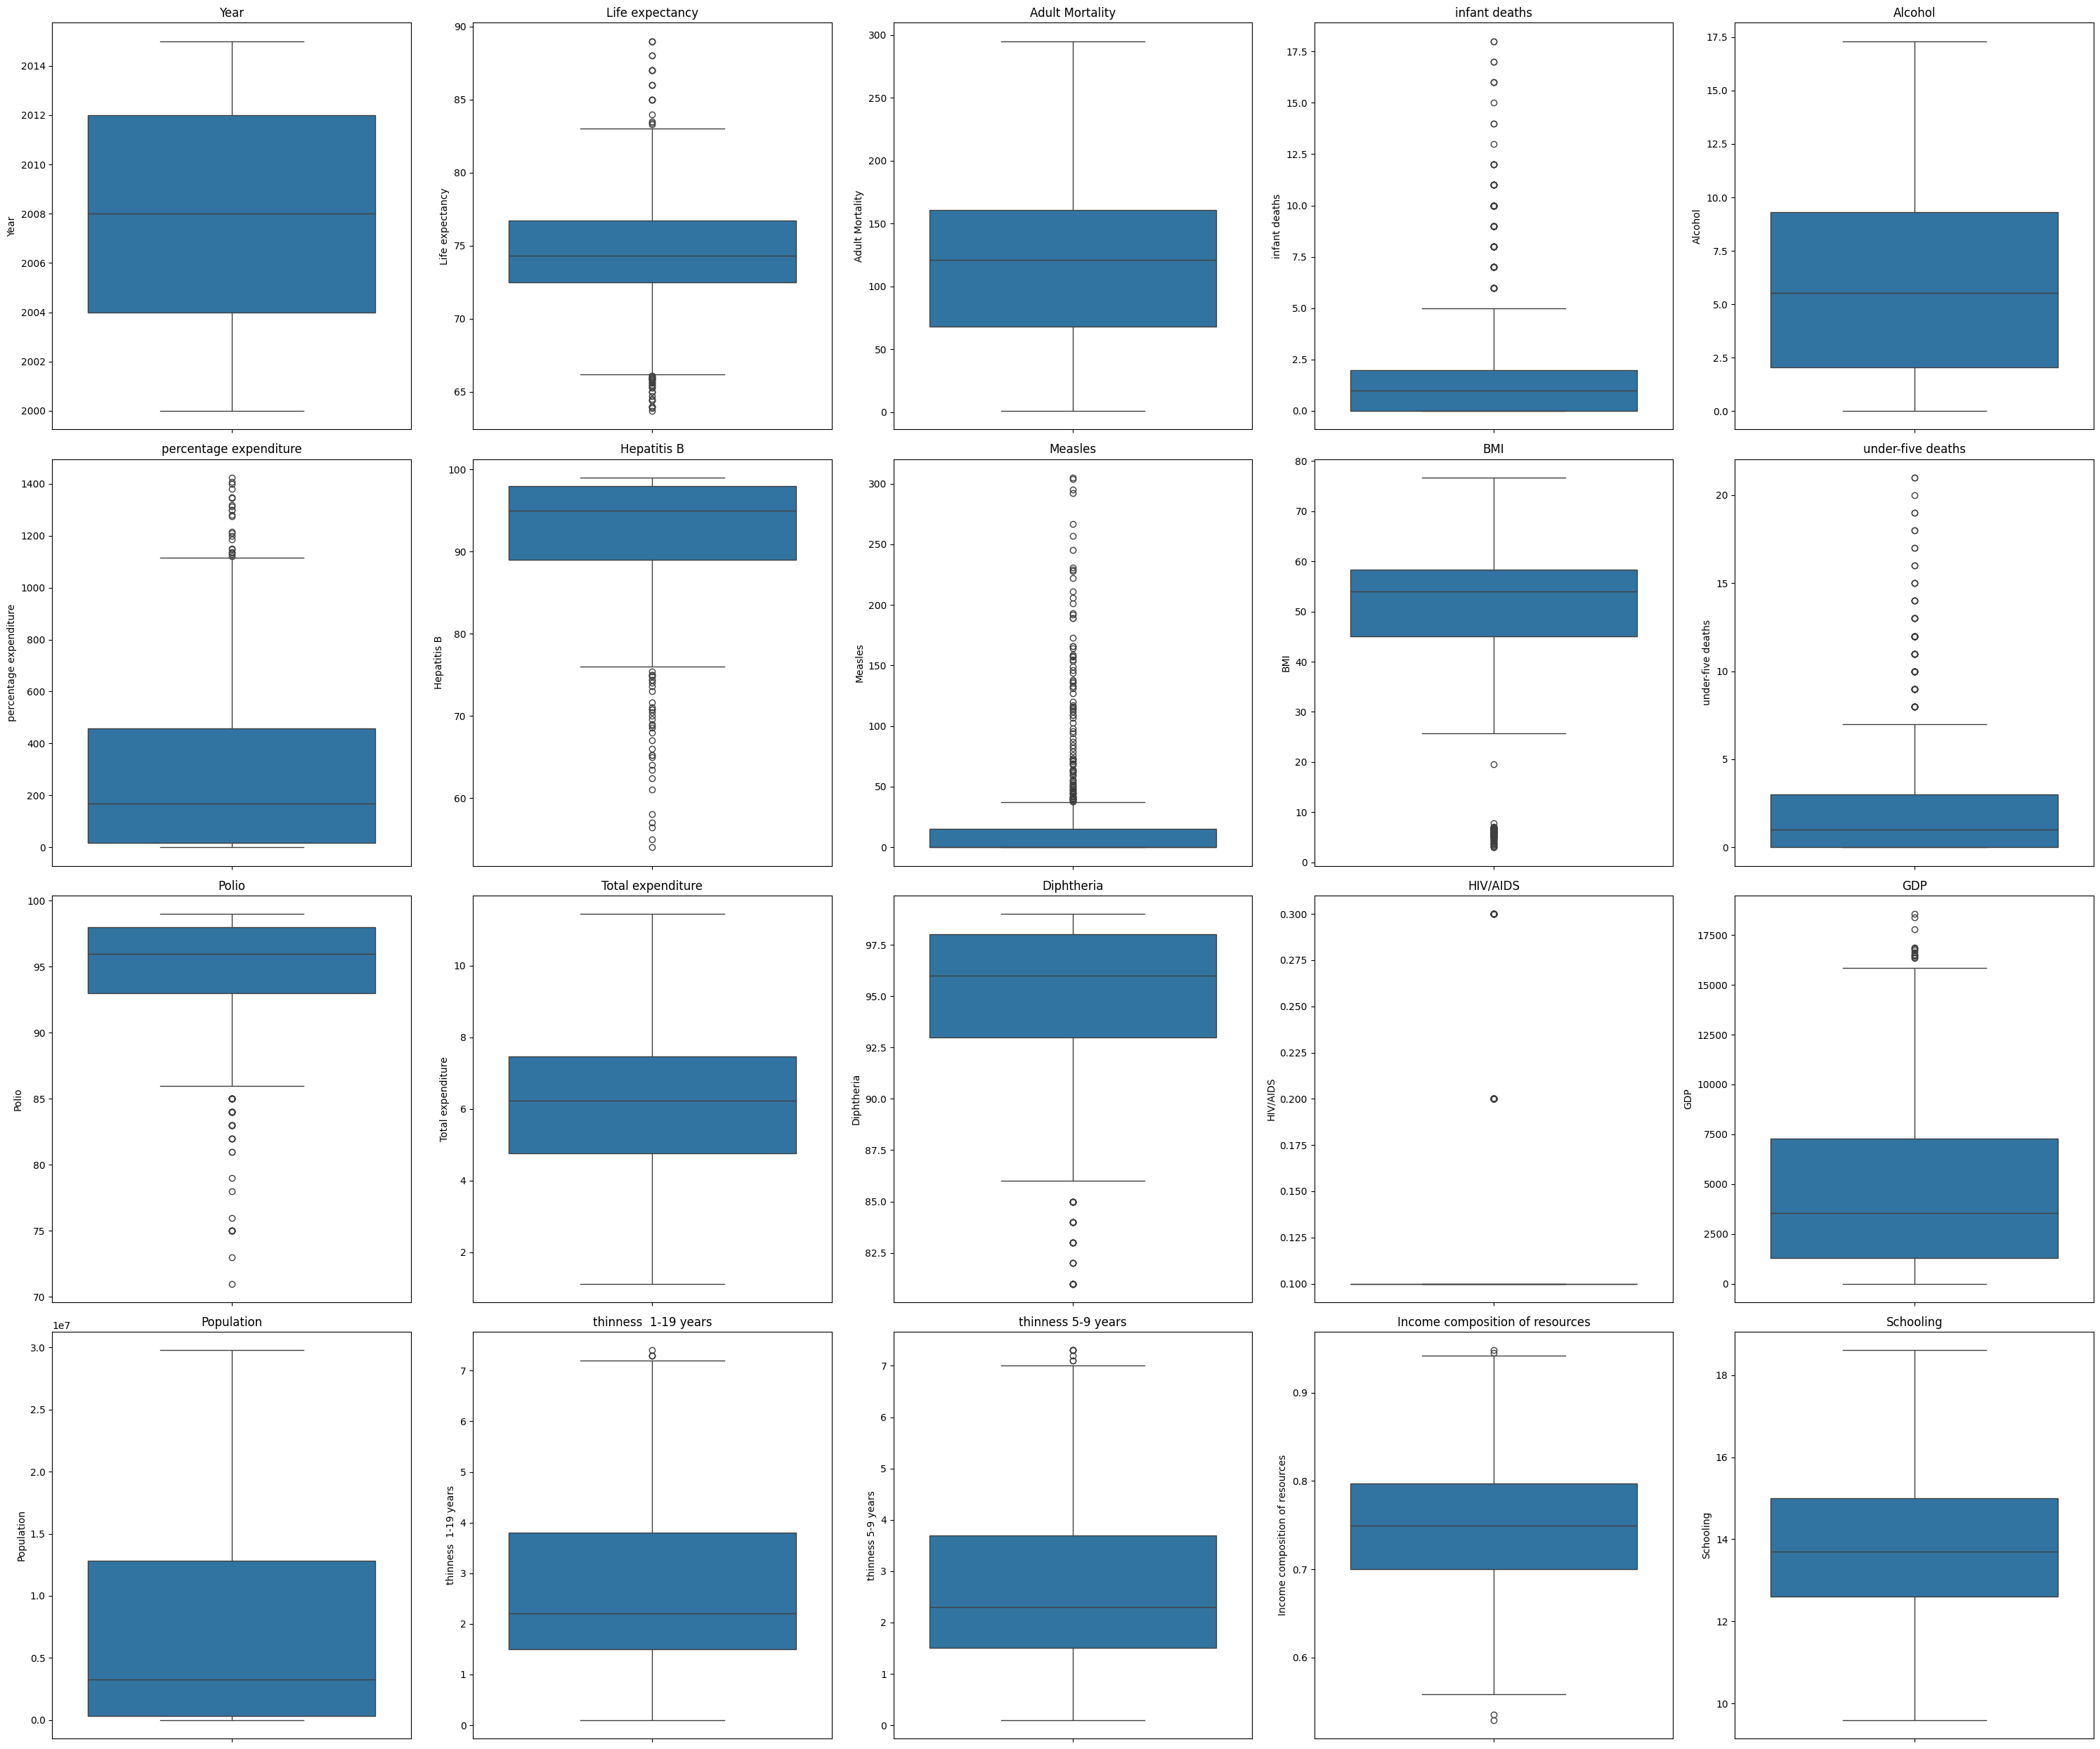

In [56]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,25))
index=0
ax=ax.flatten()


for col,value in data_EDA_remove.select_dtypes(include='number').items():
    if index >= 24:
        break
    sns.boxplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

Even after the Outlier Removal using IQR, there are still outliers in the Dataset after almost 70% of the data lost ...

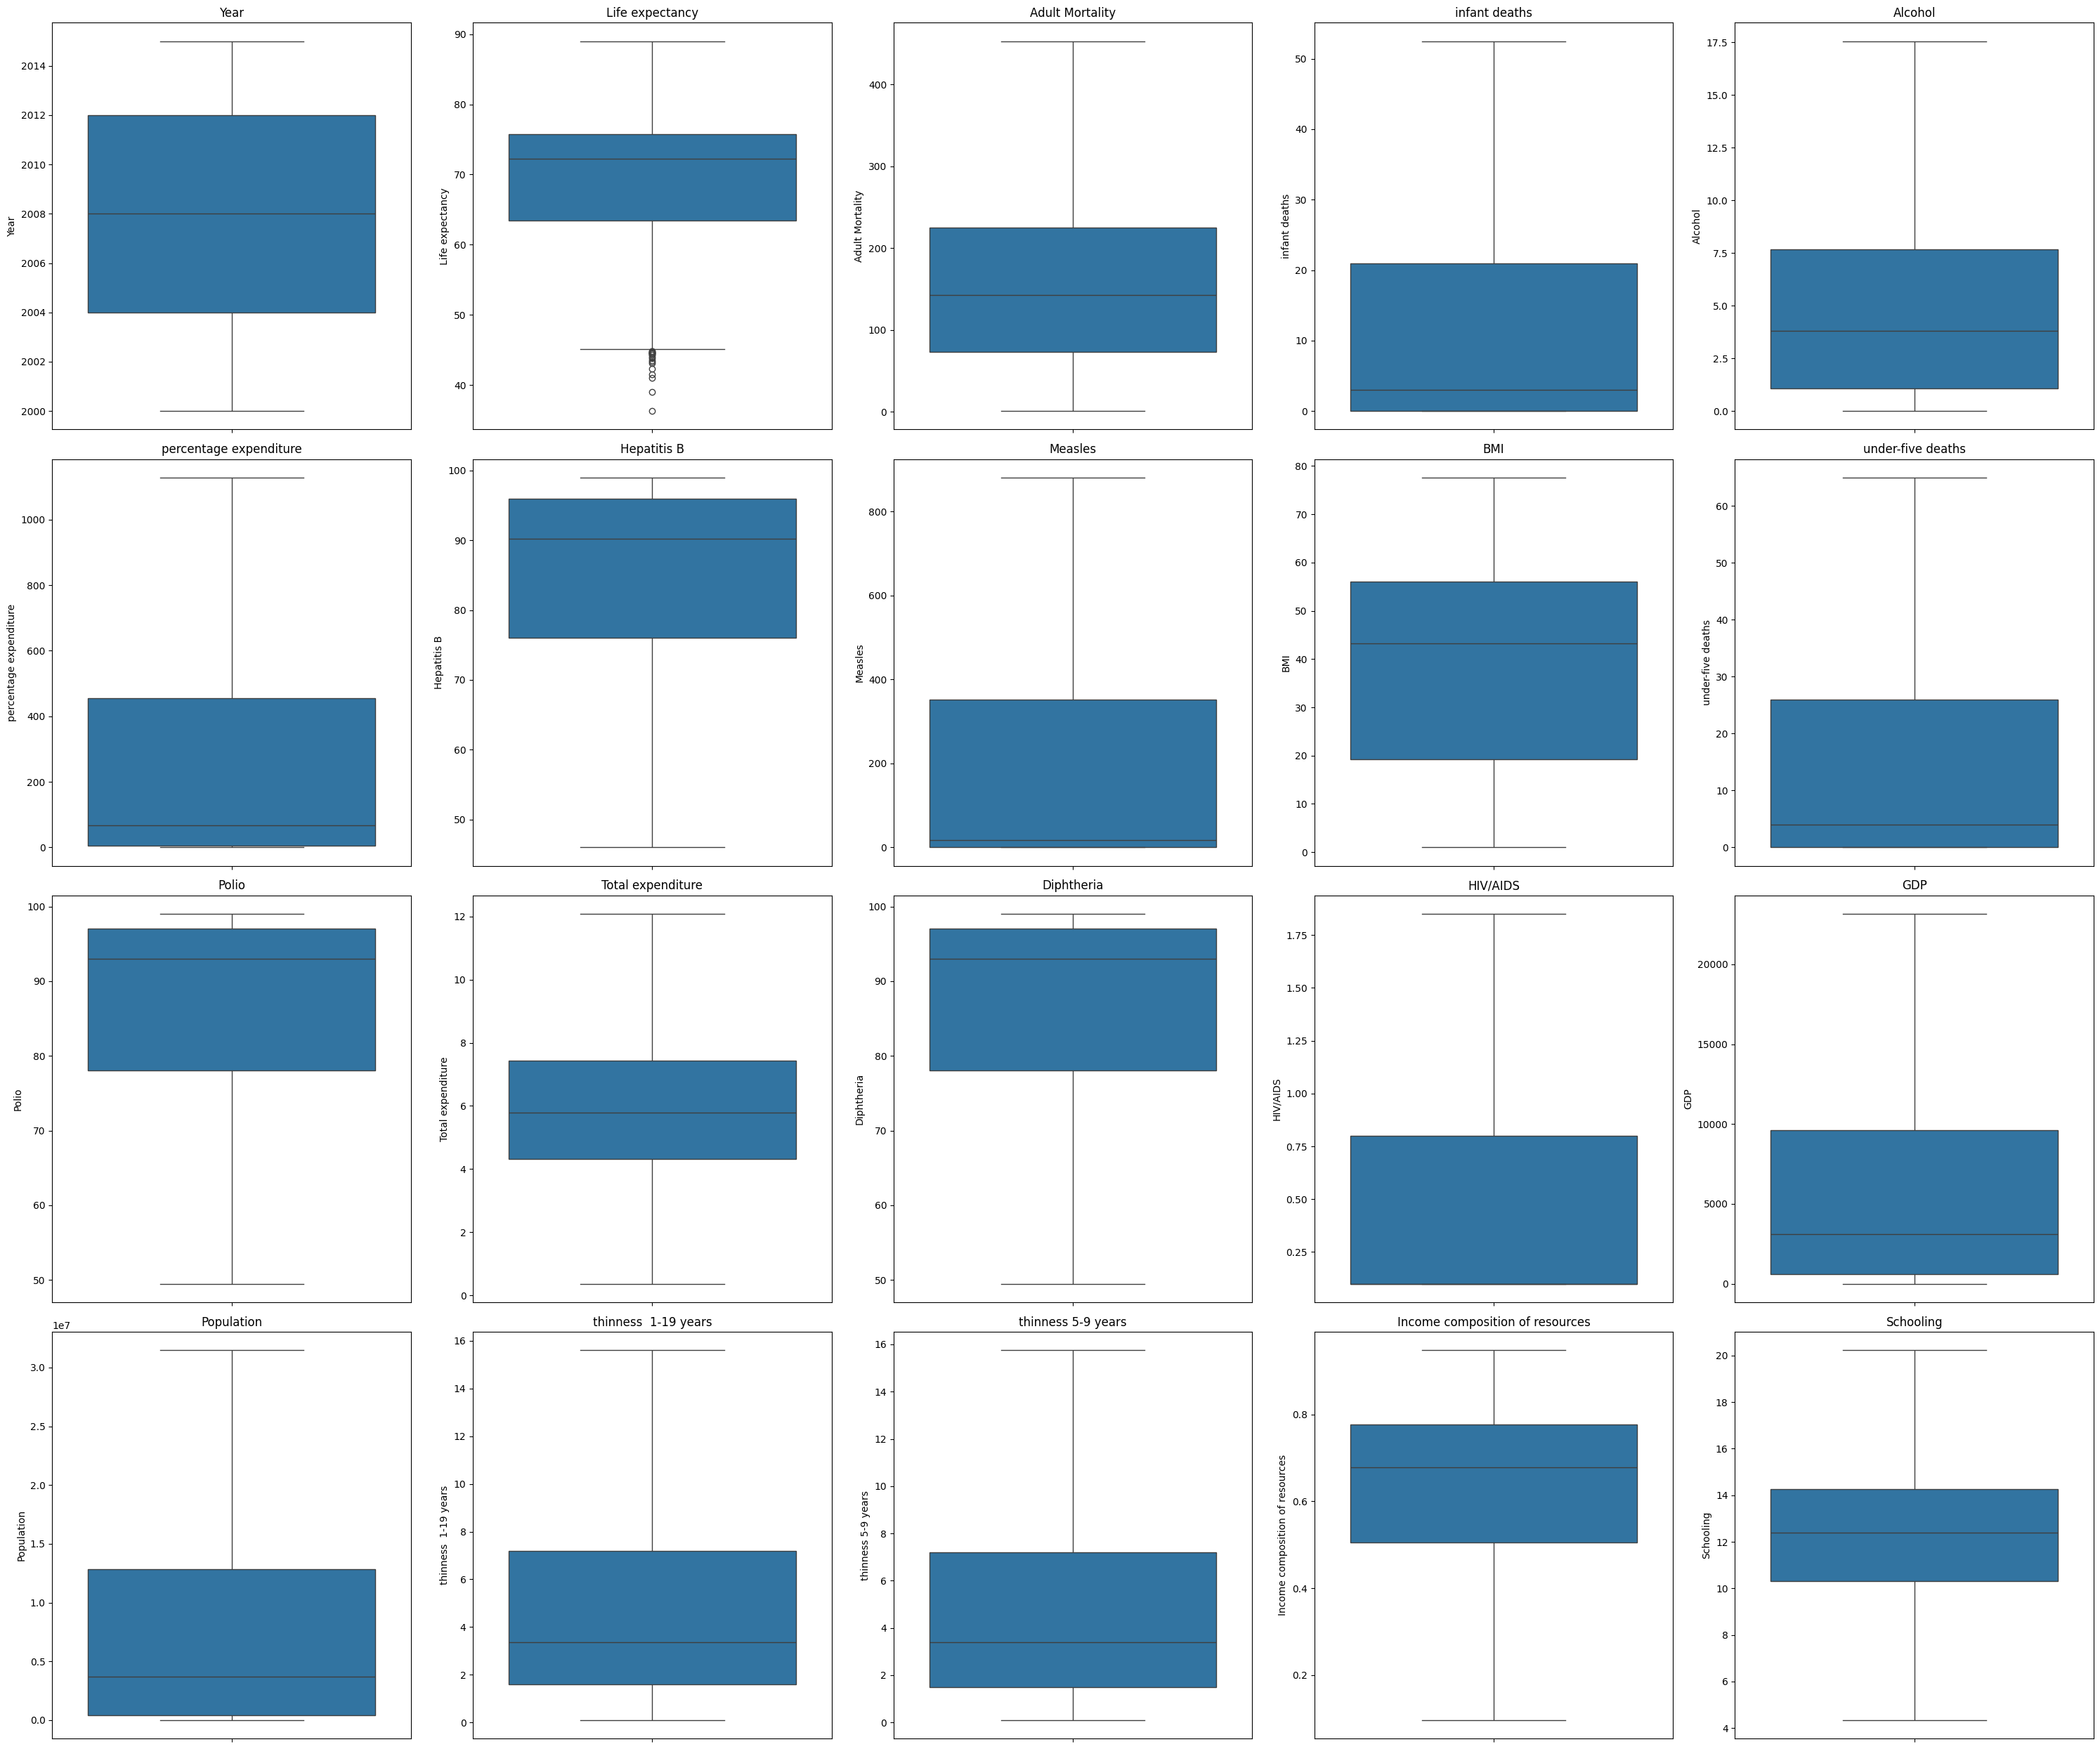

In [57]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,25))
index=0
ax=ax.flatten()


for col,value in data_EDA_cap.select_dtypes(include='number').items():
    if index >= 24:
        break
    sns.boxplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

The Caping method works really well in both outlier removal and data preserving... but there is a potential presence of the skewness in most of the Columns. In order to improve the model performance we will do certain transformations on the skewed columns to make them more Normally Distributed. This will improve our Model Performance especially in case of Linear Models.

In [58]:
data_EDA = data_EDA_cap.copy()

In [59]:
del data_EDA_cap
del data_EDA_remove
del data_EDA_imp

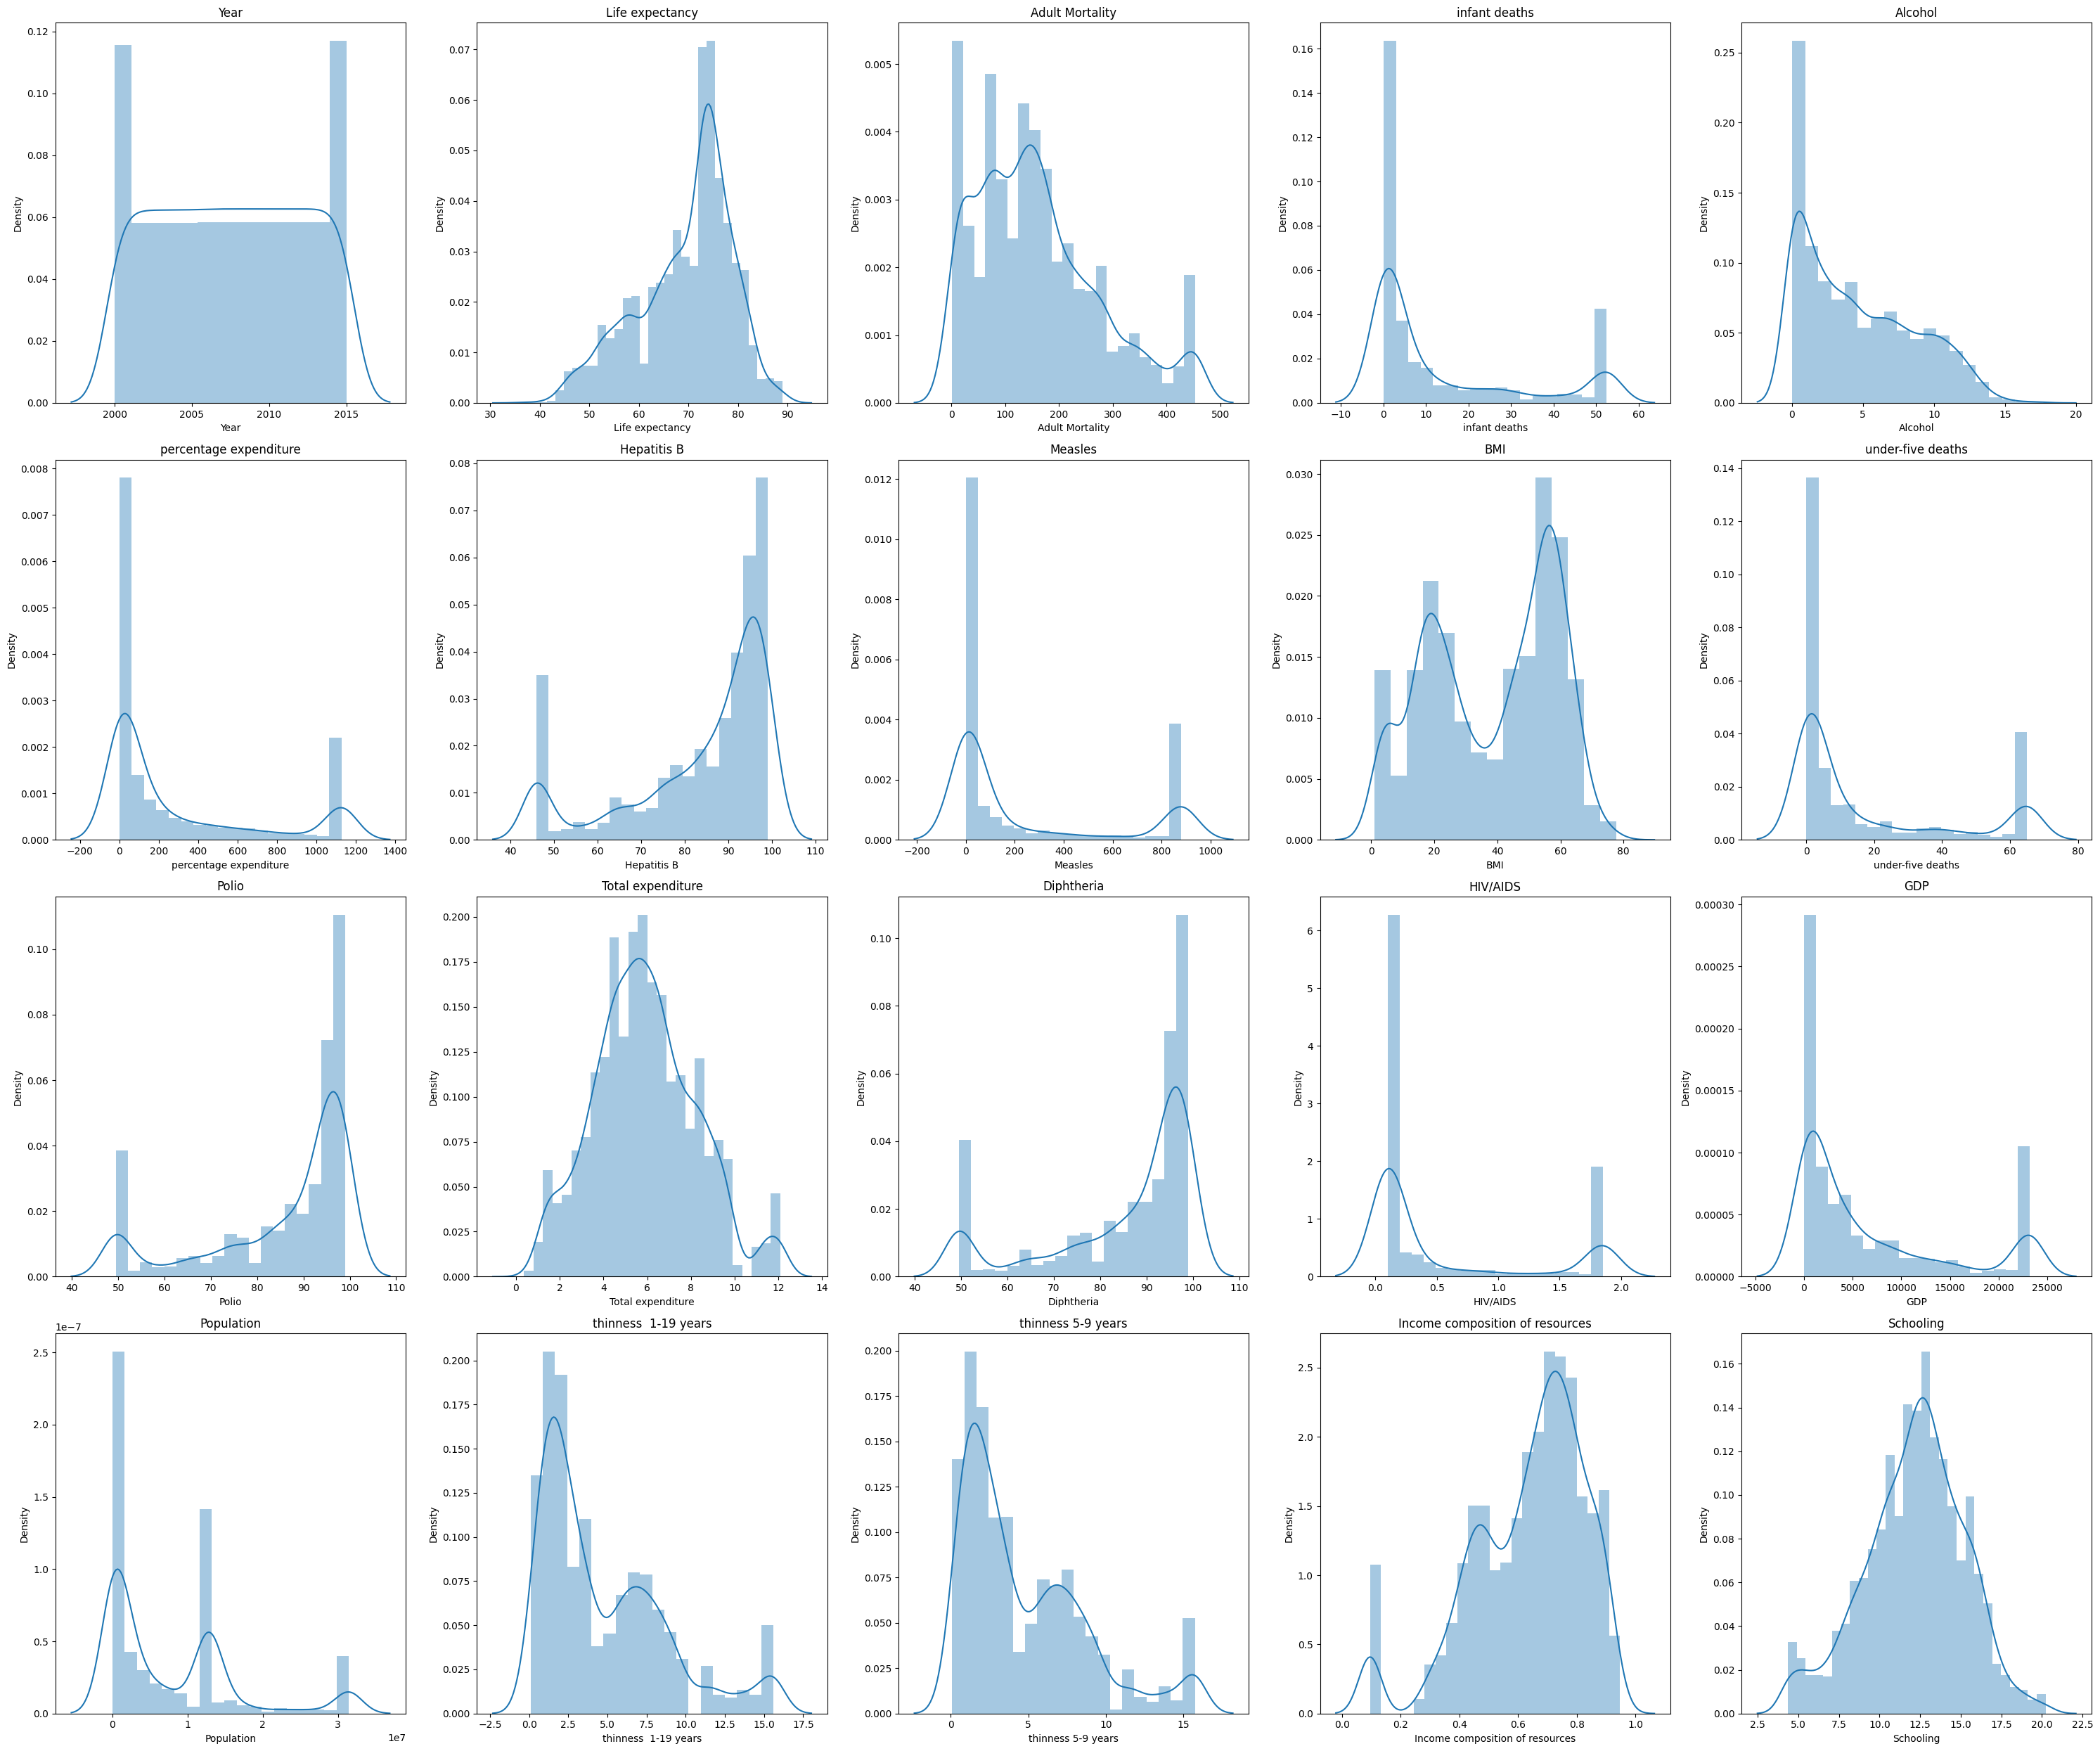

In [60]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,25))
index=0
ax=ax.flatten()


for col,value in data_EDA.select_dtypes(include='number').items():
    if index >= 24:
        break
    sns.distplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

As we can see most of our data is either left or right skewed... So we will be doing necessary transformations accordingly

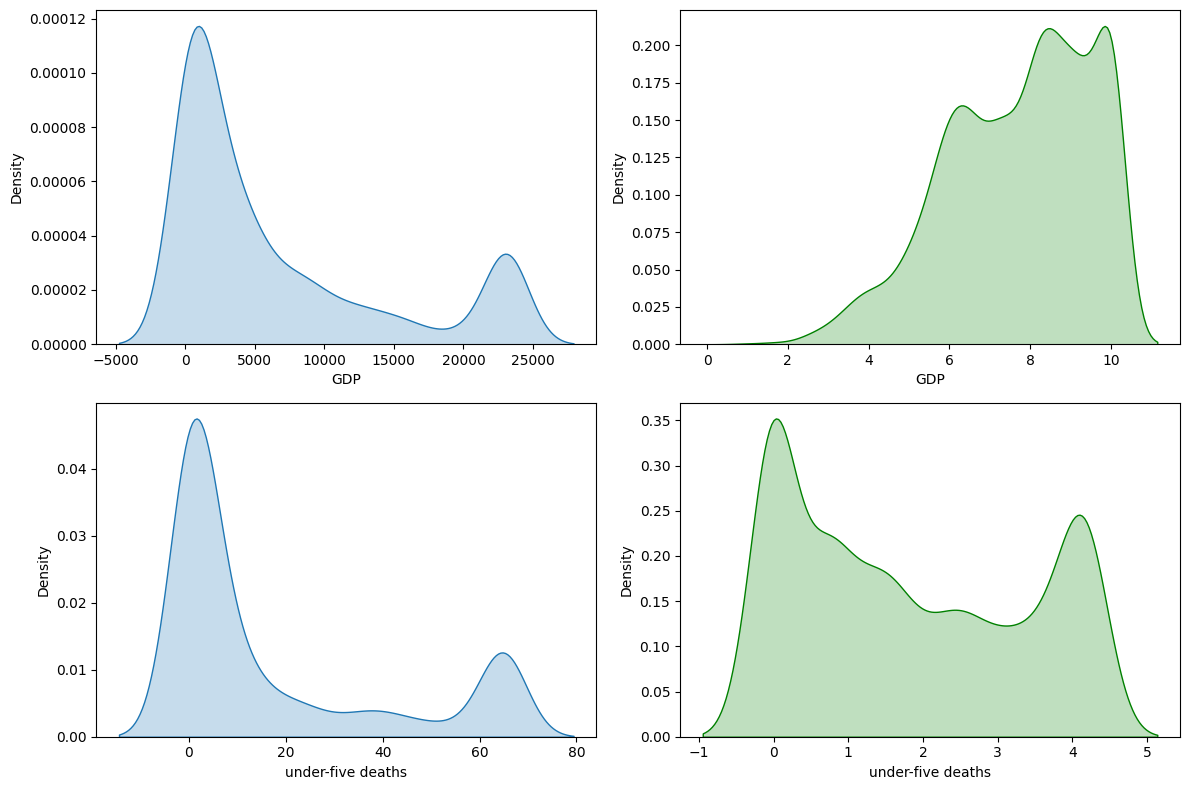

In [61]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.kdeplot(data_EDA['GDP'], shade =True)
plt.subplot(2,2,2)
sns.kdeplot(np.log1p(data_EDA['GDP']),color='green', shade =True)

plt.subplot(2,2,3)
sns.kdeplot(data_EDA["under-five deaths"], shade =True)

plt.subplot(2,2,4)
sns.kdeplot(np.log1p(data_EDA['under-five deaths']),color='green', shade =True)

plt.tight_layout()

plt.show()

It is clear that using Log Transformation on right skewed columns showed better results.

<Axes: xlabel='Hepatitis B', ylabel='Density'>

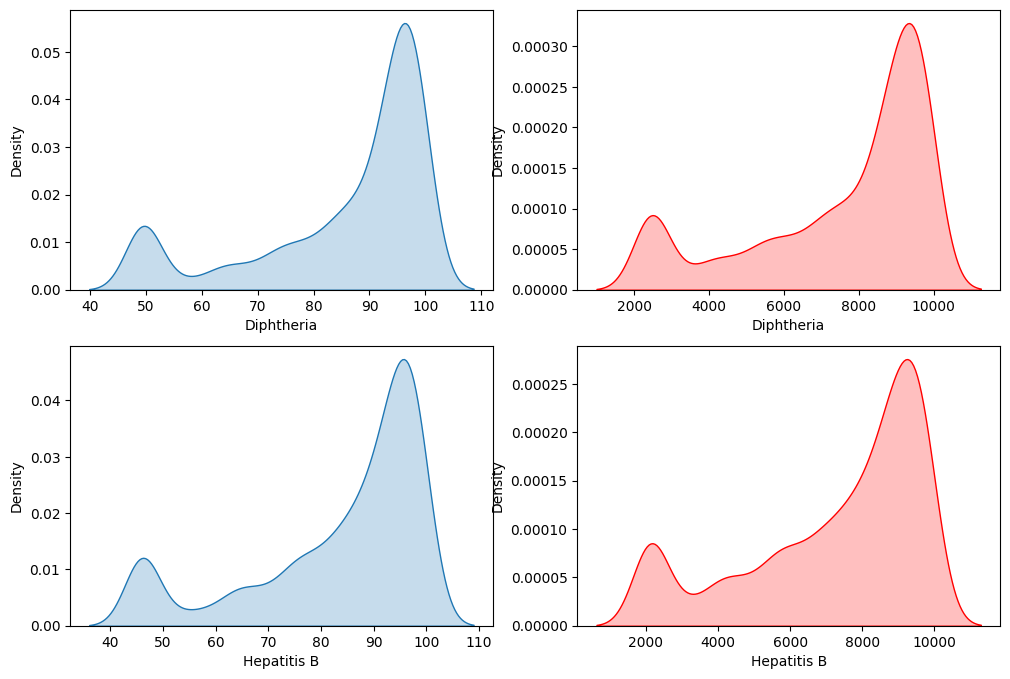

In [62]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.kdeplot(data_EDA['Diphtheria'], shade = True)
plt.subplot(2,2,2)
sns.kdeplot(np.square(data_EDA['Diphtheria']),color='red', shade = True)

plt.subplot(2,2,3)
sns.kdeplot(data_EDA["Hepatitis B"], shade = True)

plt.subplot(2,2,4)
sns.kdeplot(np.square(data_EDA['Hepatitis B']),color='red', shade = True)

Left Skewed Columns showed no affect at all after trying to make them Normally Distributed using Square Transformation Method.. So we'll leave them as they are...

In [63]:
def log_transformation(data,col):
    data[col] = np.log1p(data[col])
    return data

In [64]:
columns_to_transform = data_EDA.drop(columns=['Year','Hepatitis B','Polio','BMI','Total expenditure','Diphtheria','Income composition of resources', 'Schooling',
       'Country', 'Status', 'Life expectancy']).columns

In [65]:
columns_to_transform

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Measles', 'under-five deaths', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years'],
      dtype='object')



  ----------------------------------- Before Applying Transformations  -----------------------------------


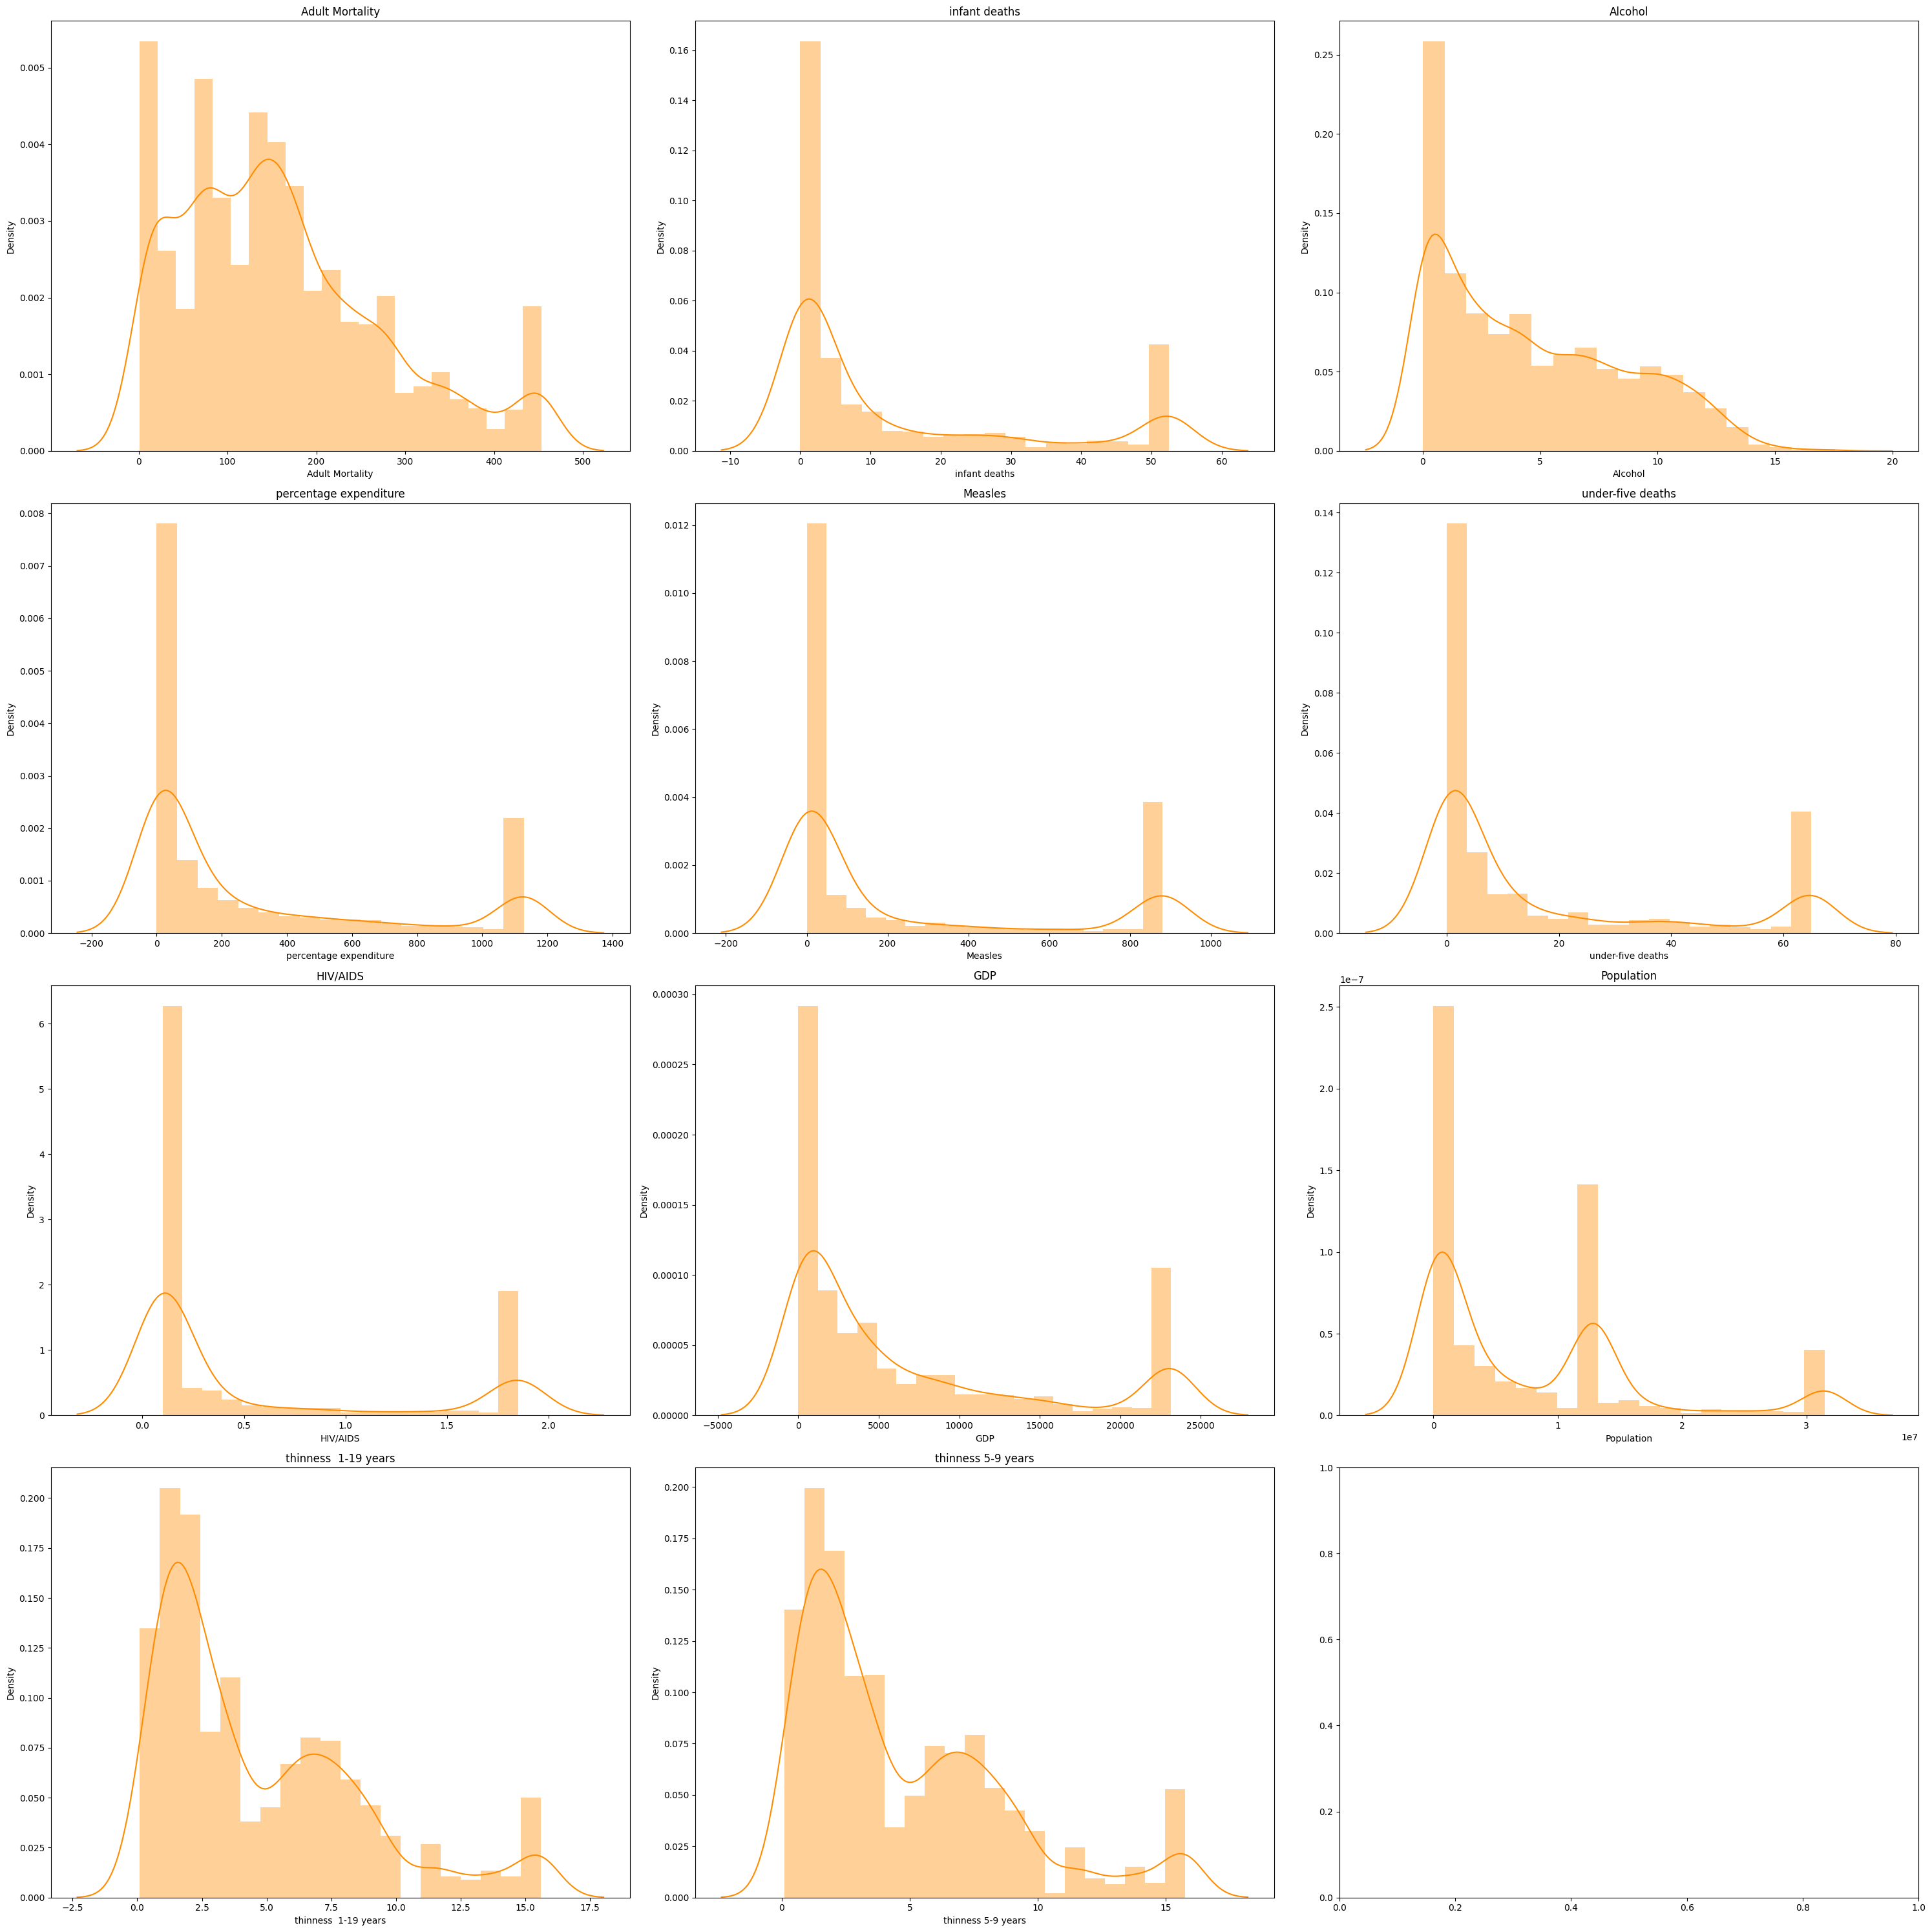

In [66]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(30,30))
index=0
ax=ax.flatten()

print(f"\n\n  {"-"*35} Before Applying Transformations  {"-"*35}")

for col,value in data_EDA[columns_to_transform].items():
    if index >= 12:
        break
    sns.distplot(value,ax=ax[index], color = 'darkorange')
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

In [67]:
log_transformed_data = data_EDA.copy()

log_transformed_data = log_transformation(log_transformed_data,columns_to_transform)



  ----------------------------------- Before Applying Transformations  -----------------------------------


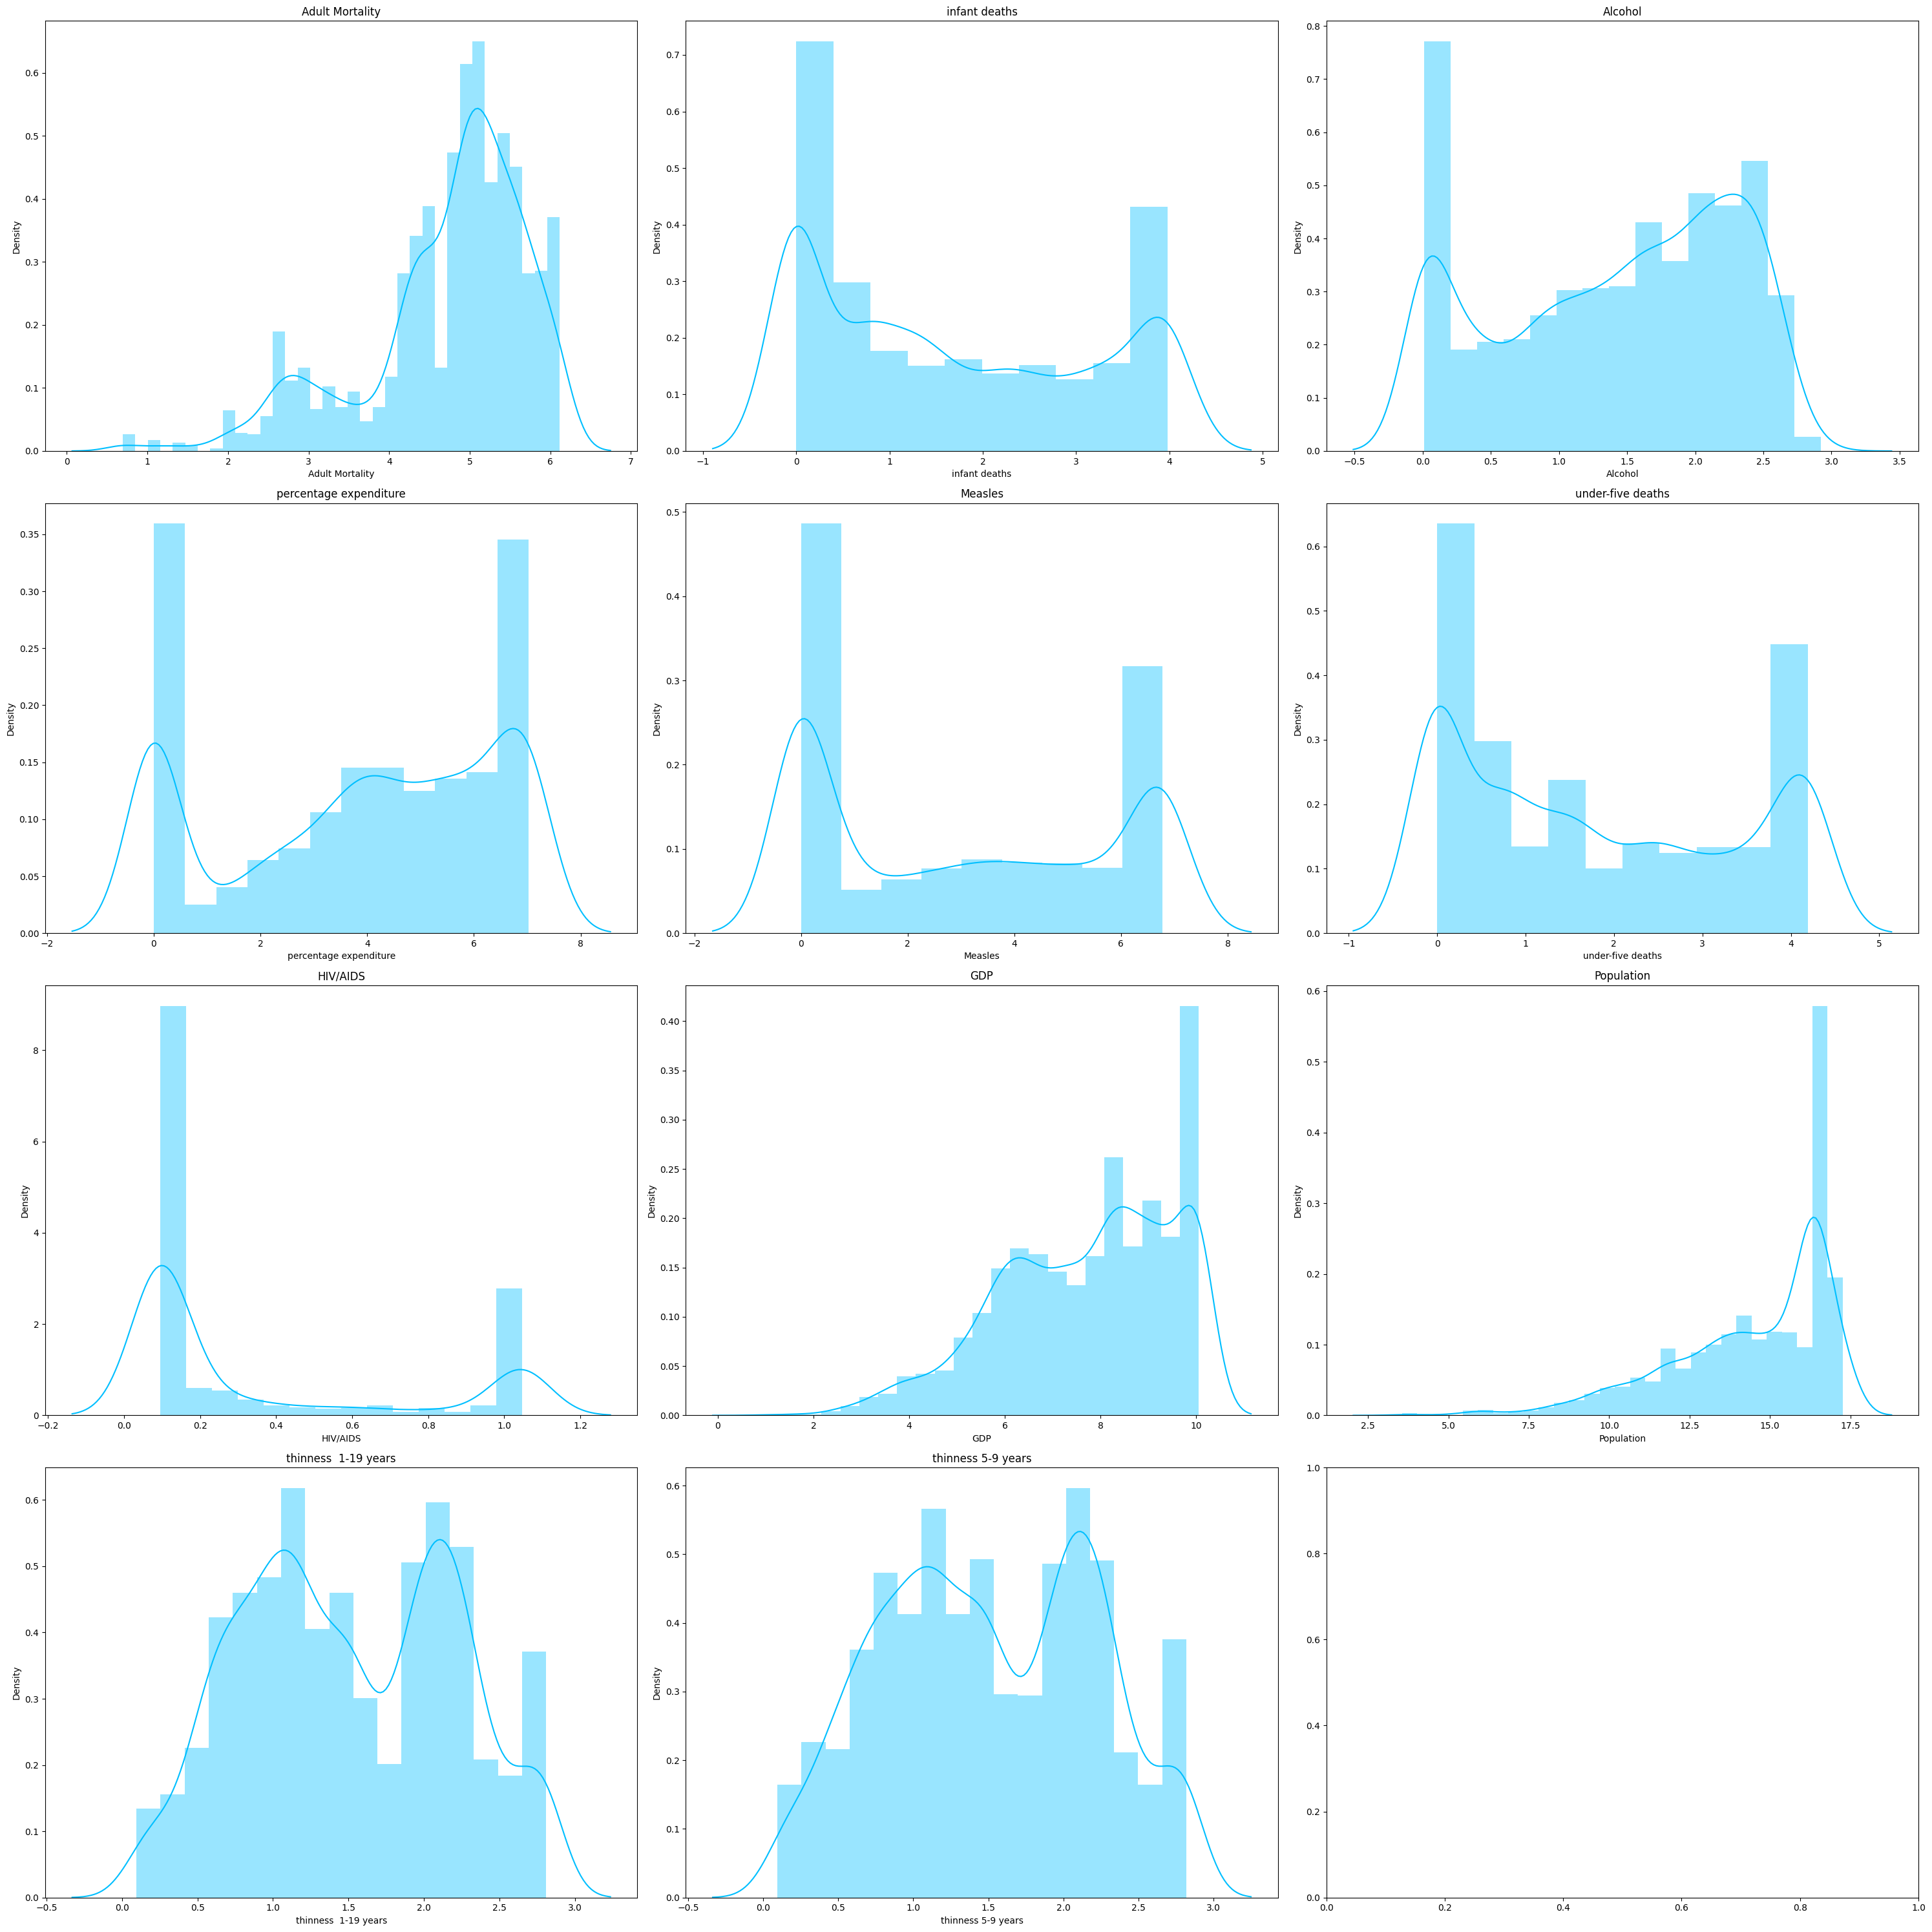

In [68]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(30,30))
index=0
ax=ax.flatten()

print(f"\n\n  {"-"*35} Before Applying Transformations  {"-"*35}")

for col,value in log_transformed_data[columns_to_transform].items():
    if index >= 12:
        break
    sns.distplot(value,ax=ax[index], color='deepskyblue')
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

It is ideal to transform the data. As we can see after applying log transform most of the columns turn to Normally Distributed except Population and Adult Mortality... But still the skewness in these two columns are managebale as they were the right skewed of same proportion before and now they are left skewed. We'll still check the other transformations on these columns to compare the Distribution.

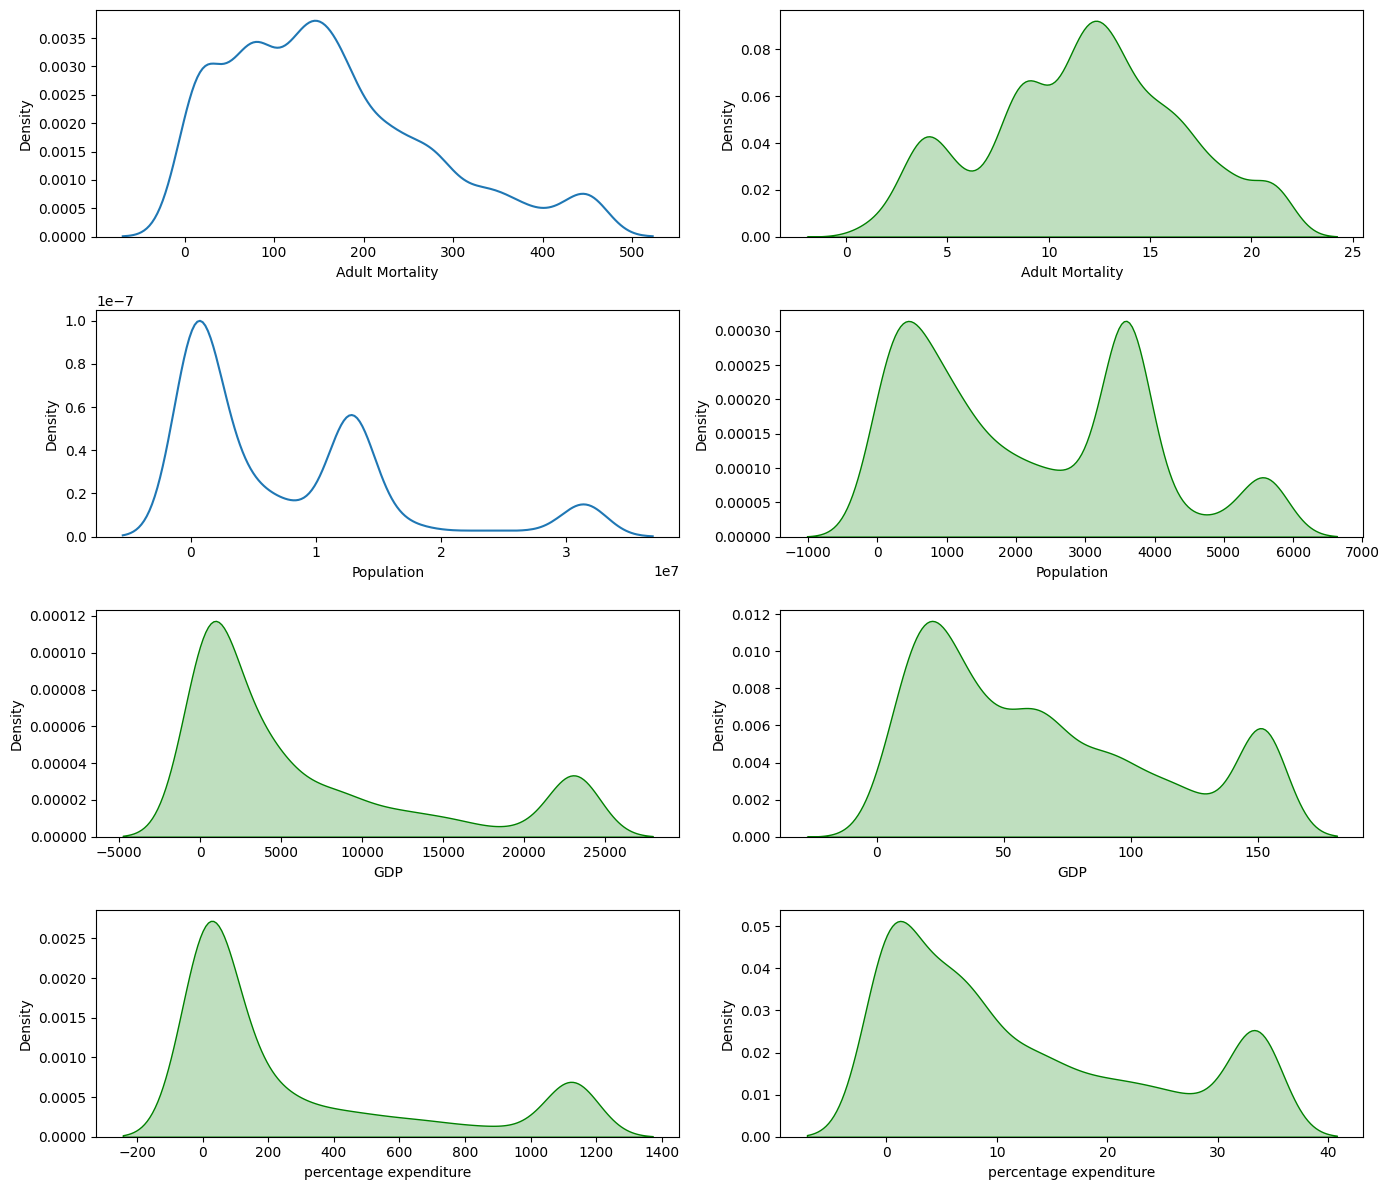

In [69]:
plt.figure(figsize=(14,12))

plt.subplot(4,2,1)
sns.kdeplot(data_EDA['Adult Mortality'])
plt.subplot(4,2,2)
sns.kdeplot(np.sqrt(data_EDA['Adult Mortality']),color='green',shade = True)

plt.subplot(4,2,3)
sns.kdeplot(data_EDA["Population"])

plt.subplot(4,2,4)
sns.kdeplot(np.sqrt(data_EDA['Population']),color='green',shade = True)

plt.subplot(4,2,5)
sns.kdeplot((data_EDA['GDP']),color='green',shade = True)

plt.subplot(4,2,6)
sns.kdeplot(np.sqrt(data_EDA['GDP']),color='green',shade = True)

plt.subplot(4,2,7)
sns.kdeplot((data_EDA['percentage expenditure']),color='green',shade = True)

plt.subplot(4,2,8)
sns.kdeplot(np.sqrt(data_EDA['percentage expenditure']),color='green',shade = True)
plt.tight_layout()

Square Root Transformation showed better results than using Log Transformation for Population, Adult Mortality columns, GDP and Percentage Expenditure columns.

In [70]:
log_transform_cols = data_EDA[columns_to_transform].drop(columns=['percentage expenditure','Adult Mortality','GDP', 'Population']).columns
sqrt_transform_cols = data_EDA[['percentage expenditure','Adult Mortality','GDP', 'Population']].columns


In [71]:
log_transform_cols

Index(['infant deaths', 'Alcohol', 'Measles', 'under-five deaths', 'HIV/AIDS',
       'thinness  1-19 years', 'thinness 5-9 years'],
      dtype='object')

In [72]:
sqrt_transform_cols

Index(['percentage expenditure', 'Adult Mortality', 'GDP', 'Population'], dtype='object')

**We will see now Before and After Results on Distributions of the Skewed Columns after Applying Transformation.**



  ----------------------------------- Before Applying any Transformations  -----------------------------------


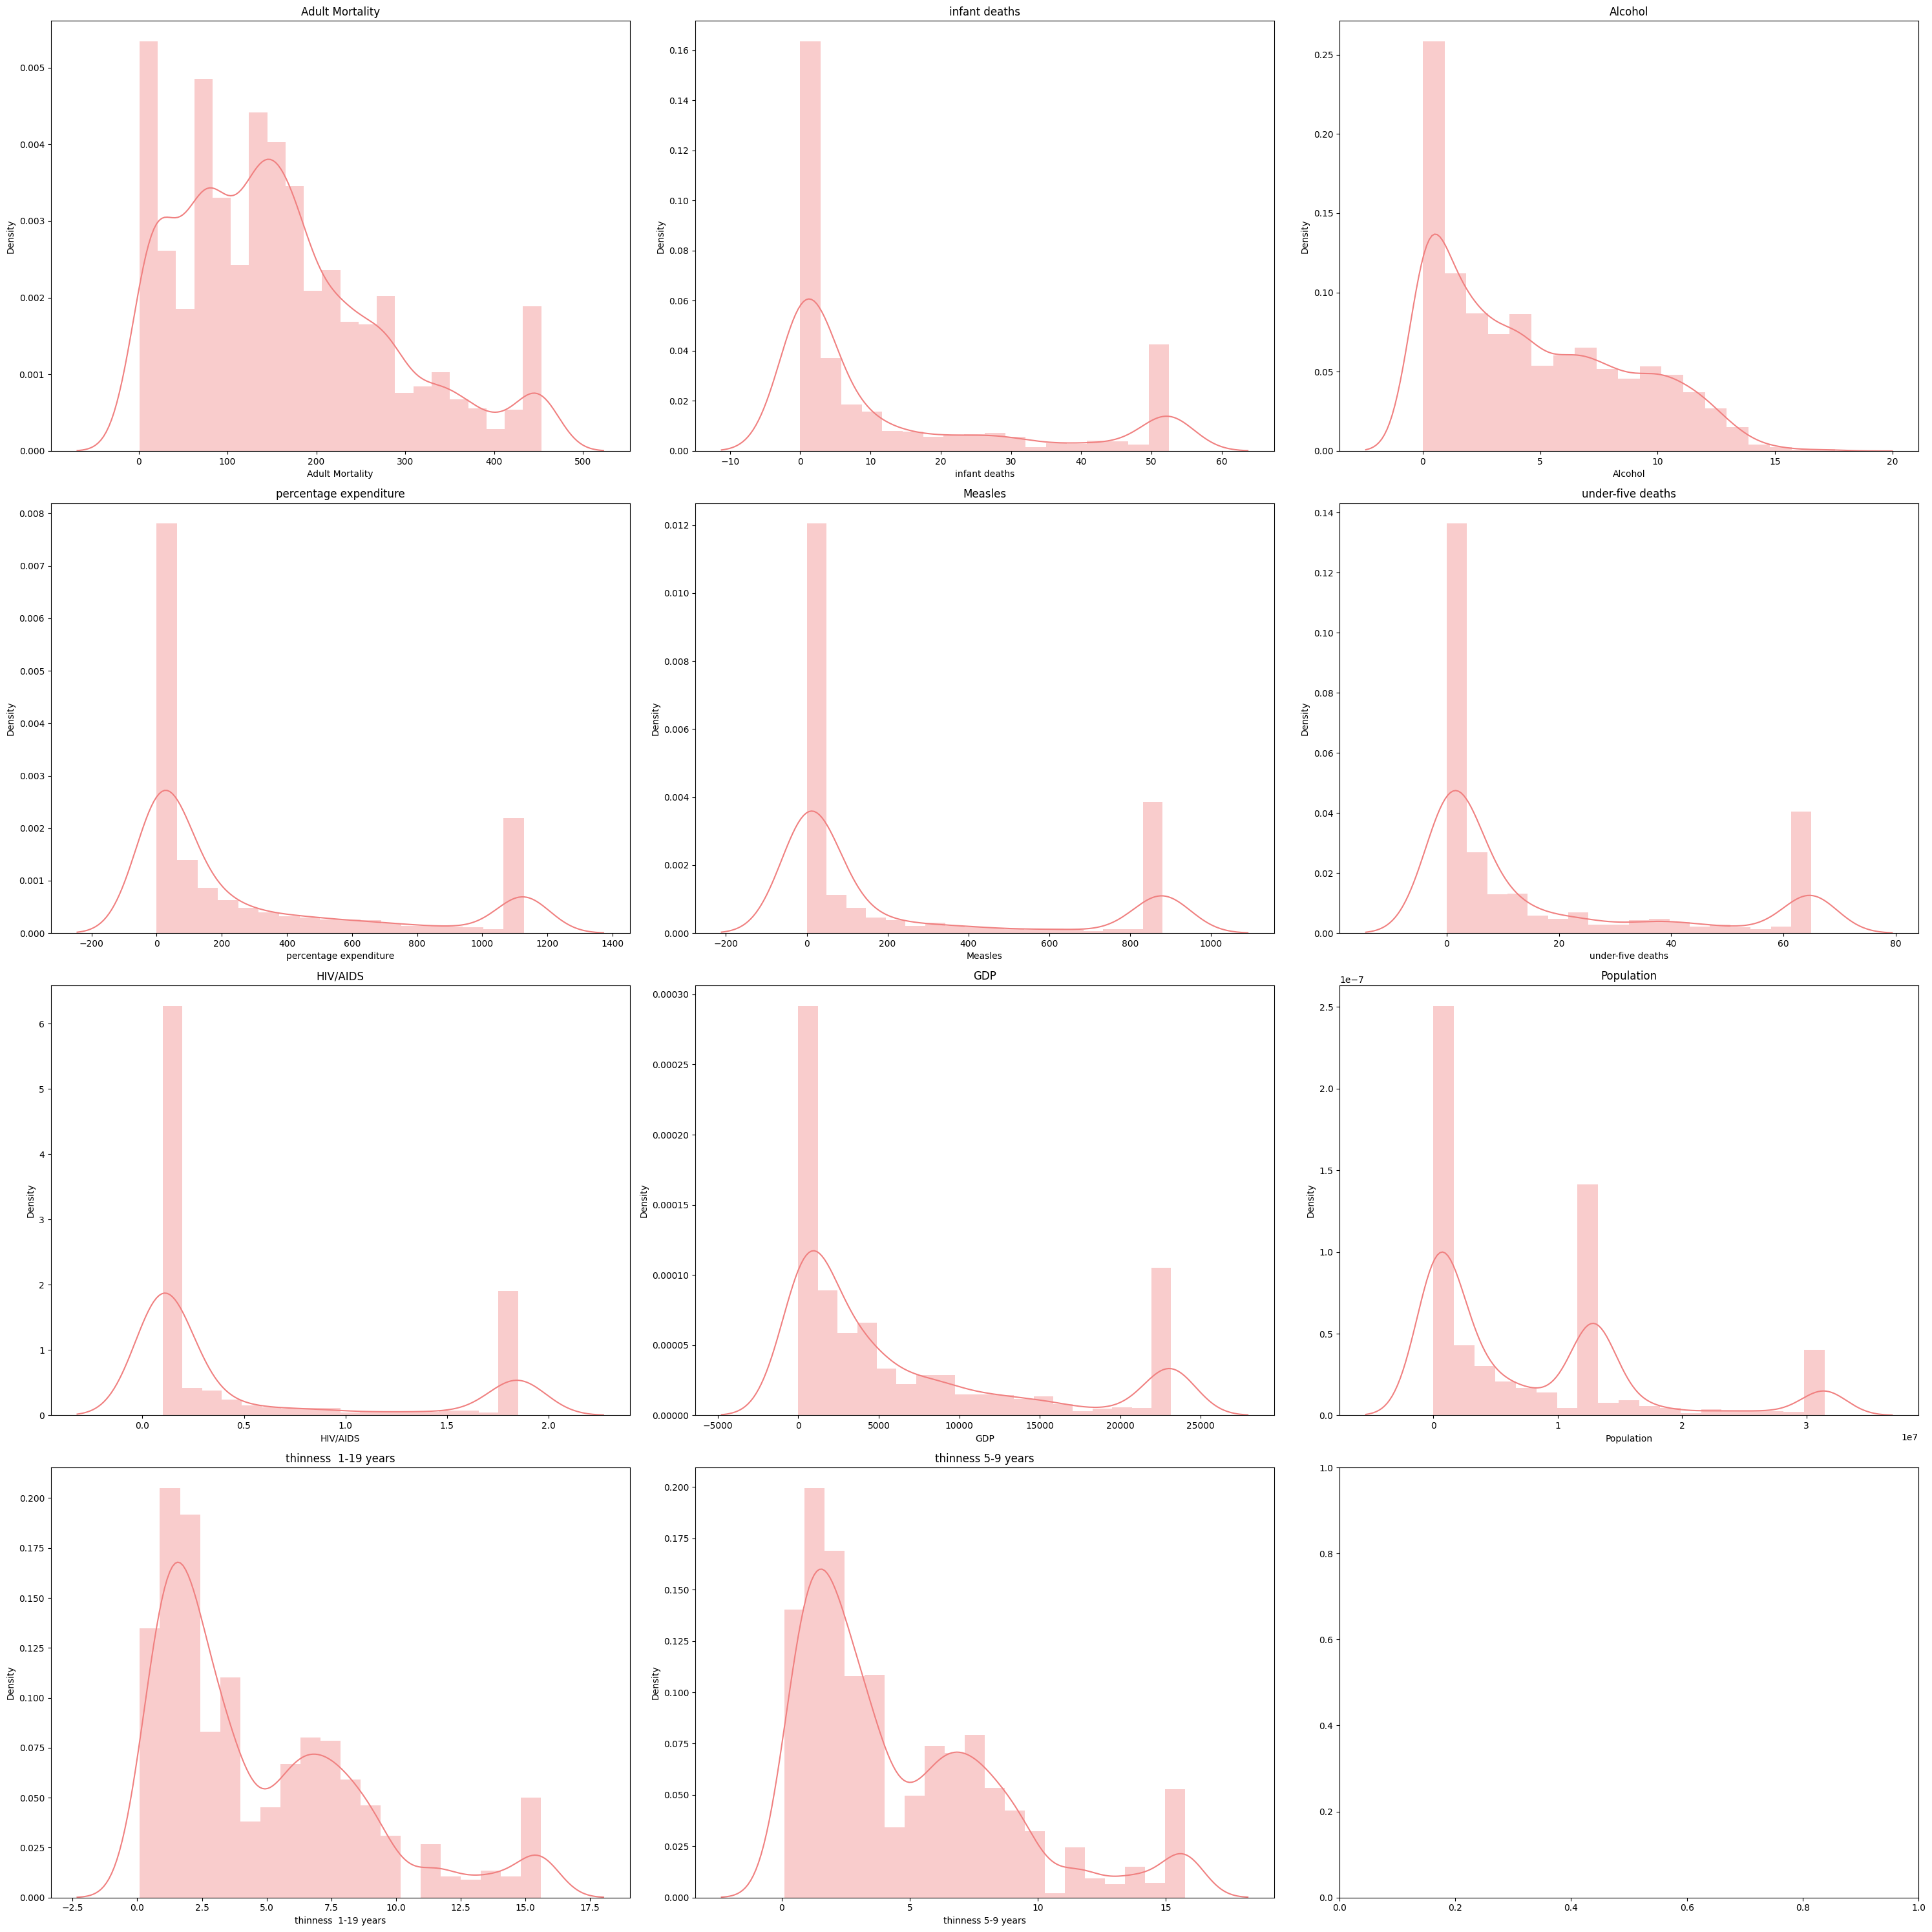

In [73]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(30,30))
index=0
ax=ax.flatten()

print(f"\n\n  {"-"*35} Before Applying any Transformations  {"-"*35}")

for col,value in data_EDA[columns_to_transform].items():
    if index >= 12:
        break
    sns.distplot(value,ax=ax[index], color = 'lightcoral')
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

In [74]:
#                   ----     Functions for Transformation.        ----

def log_transformation(data,col):
    data[col] = np.log1p(data[col])
    return data

def sqrt_transformation(data,col):
    data[col] = np.sqrt(data[col])
    return data

In [75]:

data_EDA[log_transform_cols] = log_transformation(data_EDA[log_transform_cols],log_transform_cols)

data_EDA[sqrt_transform_cols] = sqrt_transformation(data_EDA[sqrt_transform_cols],sqrt_transform_cols)



  ----------------------------------- After Applying Transformations  -----------------------------------


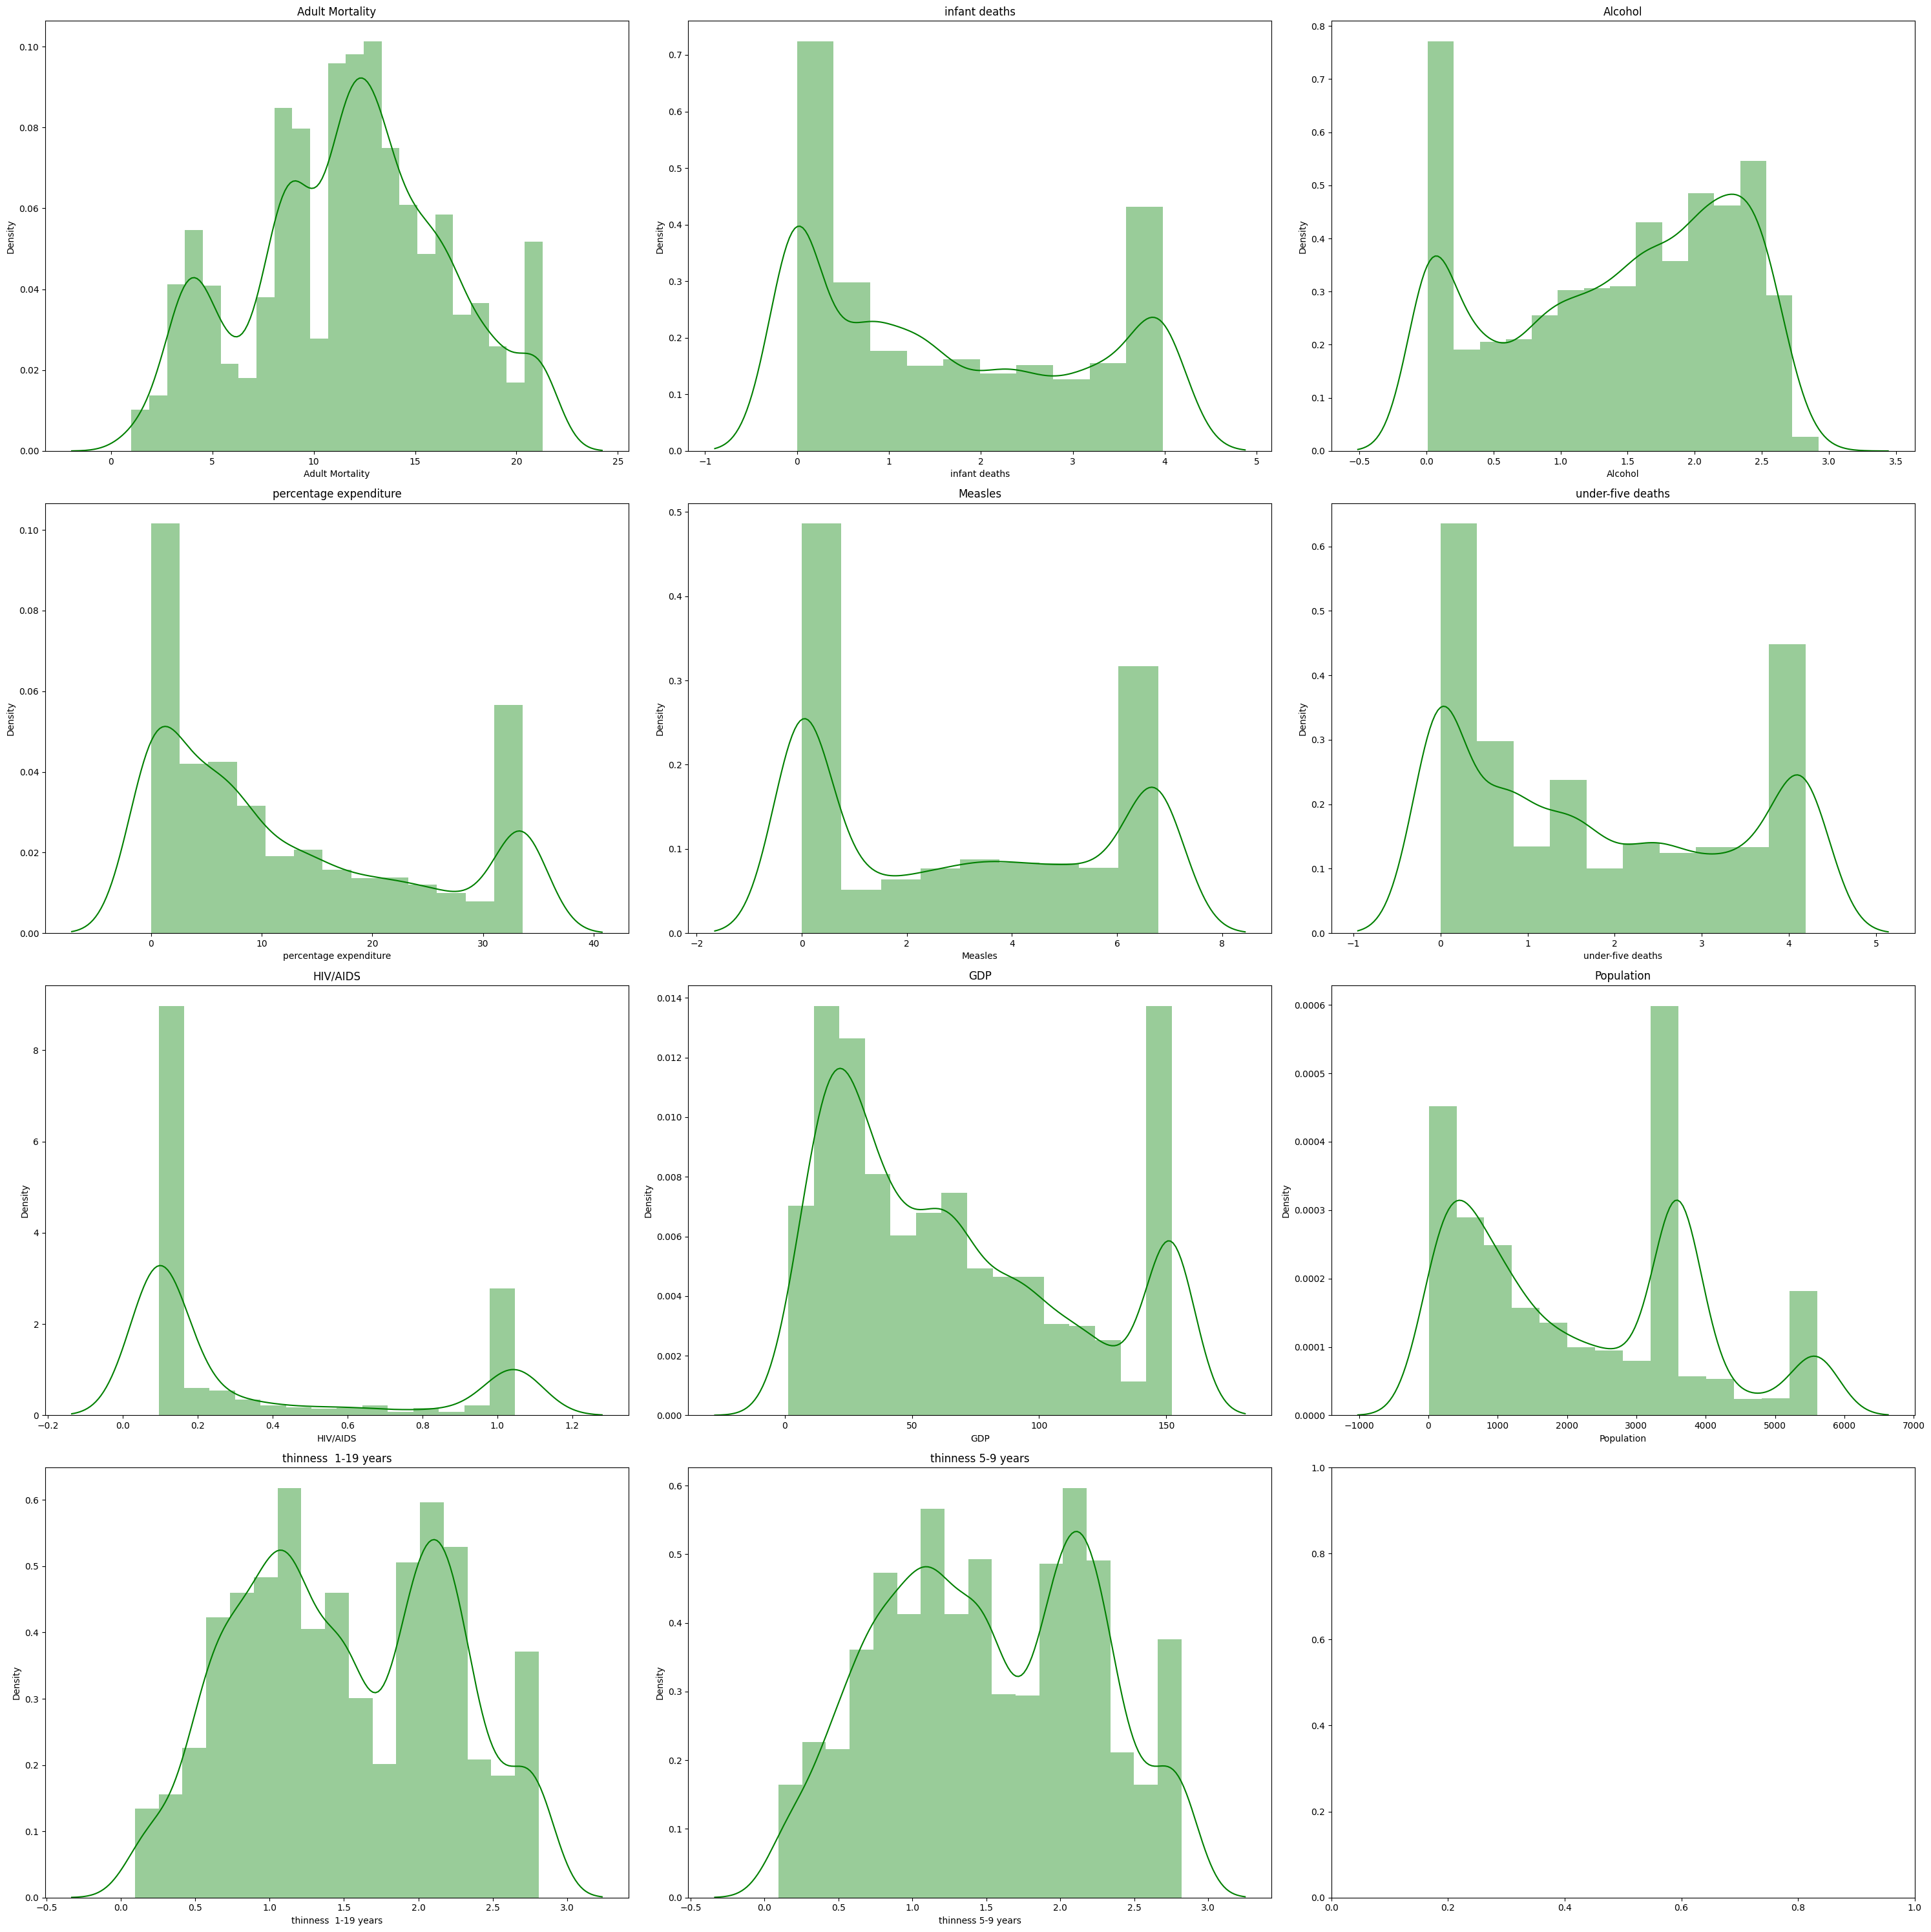

In [76]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(30,30))
index=0
ax=ax.flatten()

print(f"\n\n  {"-"*35} After Applying Transformations  {"-"*35}")

for col,value in data_EDA[columns_to_transform].items():
    if index >= 12:
        break
    sns.distplot(value,ax=ax[index], color='green')
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

Most of the Columns in ourt Data are now almost Normally Distribute. It will definitely improve the Model Performance of our Data.

In [77]:
print(data_EDA[['Country']].value_counts())

print("\n\n",data_EDA['Country'].nunique())

print("\n\n",data_EDA['Country'].unique())

Country    
Afghanistan    16
Saint Lucia    16
New Zealand    16
Nicaragua      16
Niger          16
               ..
Greece         16
Grenada        16
Zimbabwe       16
Timor-Leste    14
Montenegro     10
Name: count, Length: 181, dtype: int64


 181


 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eth

In [78]:
print(data_EDA['Country'].value_counts().describe())

count    181.000000
mean      15.955801
std        0.469316
min       10.000000
25%       16.000000
50%       16.000000
75%       16.000000
max       16.000000
Name: count, dtype: float64


As the Country contains 183 entries and each country has 16 values, it will create a lot of input features after encoding (OneHotEncoding), and we cannot replace less occuring countries with "_Other_" in this case as well because Countries not occuring 16 times are very few. The only option left is to do Encoding or Drop the column entirely. But the Country column might be useful. So, we will use OneHotEncoding on the Country column and then if needed we may perform PCA on the data... to do Dimentionality Reduction...
And check the results Side by Side.

In [79]:
data_EDA['Status'].value_counts()

Status
Developing    2376
Developed      512
Name: count, dtype: int64

for Status column, we will perform Ordinal Encoding, giving Developed Conutry more previledge then the Developing country

Dveloped -> 1         |         Developing -> 0

### Data Cleaning (  Removal Of Highly Corelated Columns  )

Checking Corelation

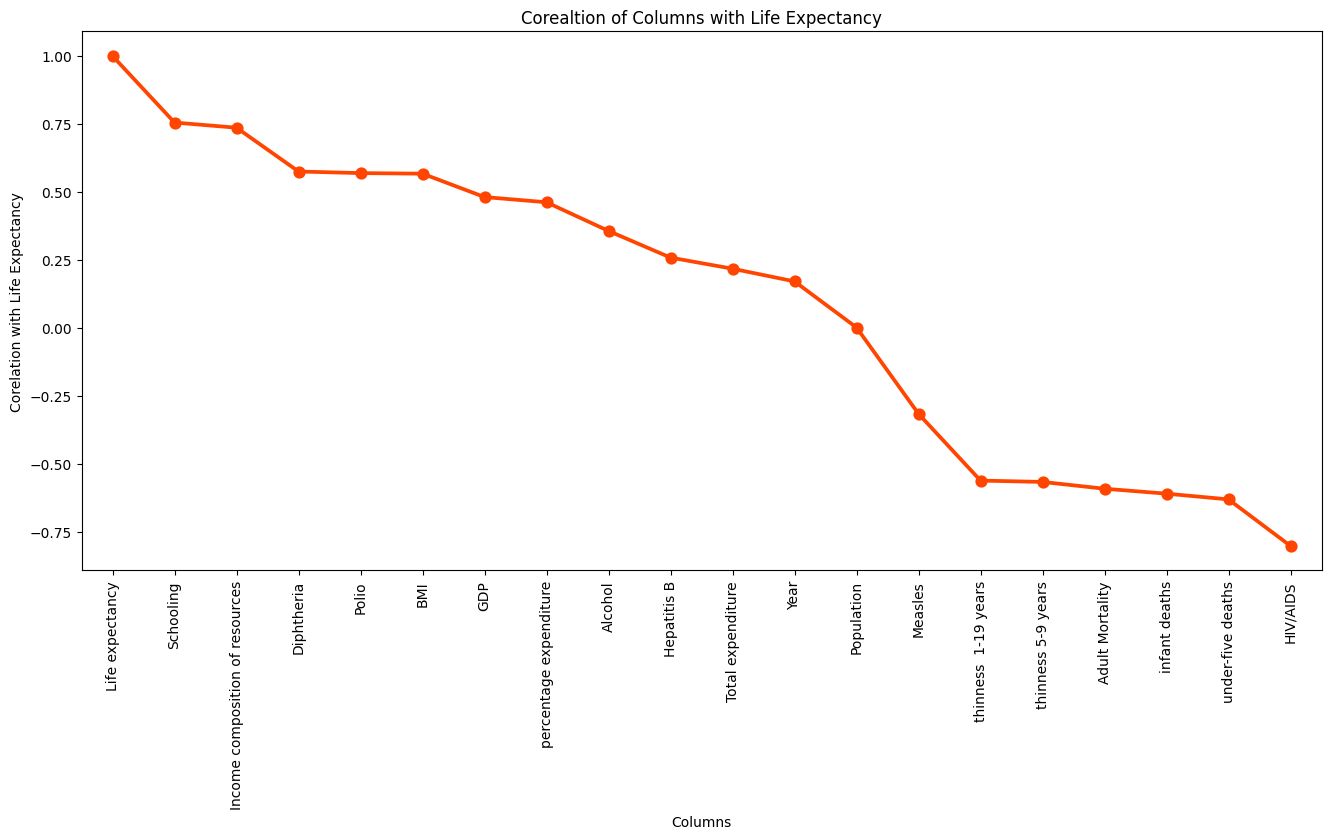

In [80]:
plt.figure(figsize=(16,7))

Corelated_features = pd.DataFrame(data_EDA.corr(numeric_only= True)['Life expectancy']).sort_values(by = 'Life expectancy',ascending=False).reset_index()
sns.pointplot(data=Corelated_features, x = 'index', y='Life expectancy', color='orangered')
plt.title('Corealtion of Columns with Life Expectancy')
plt.xlabel('Columns')
plt.ylabel('Corelation with Life Expectancy')
plt.xticks(rotation=90)
plt.show()

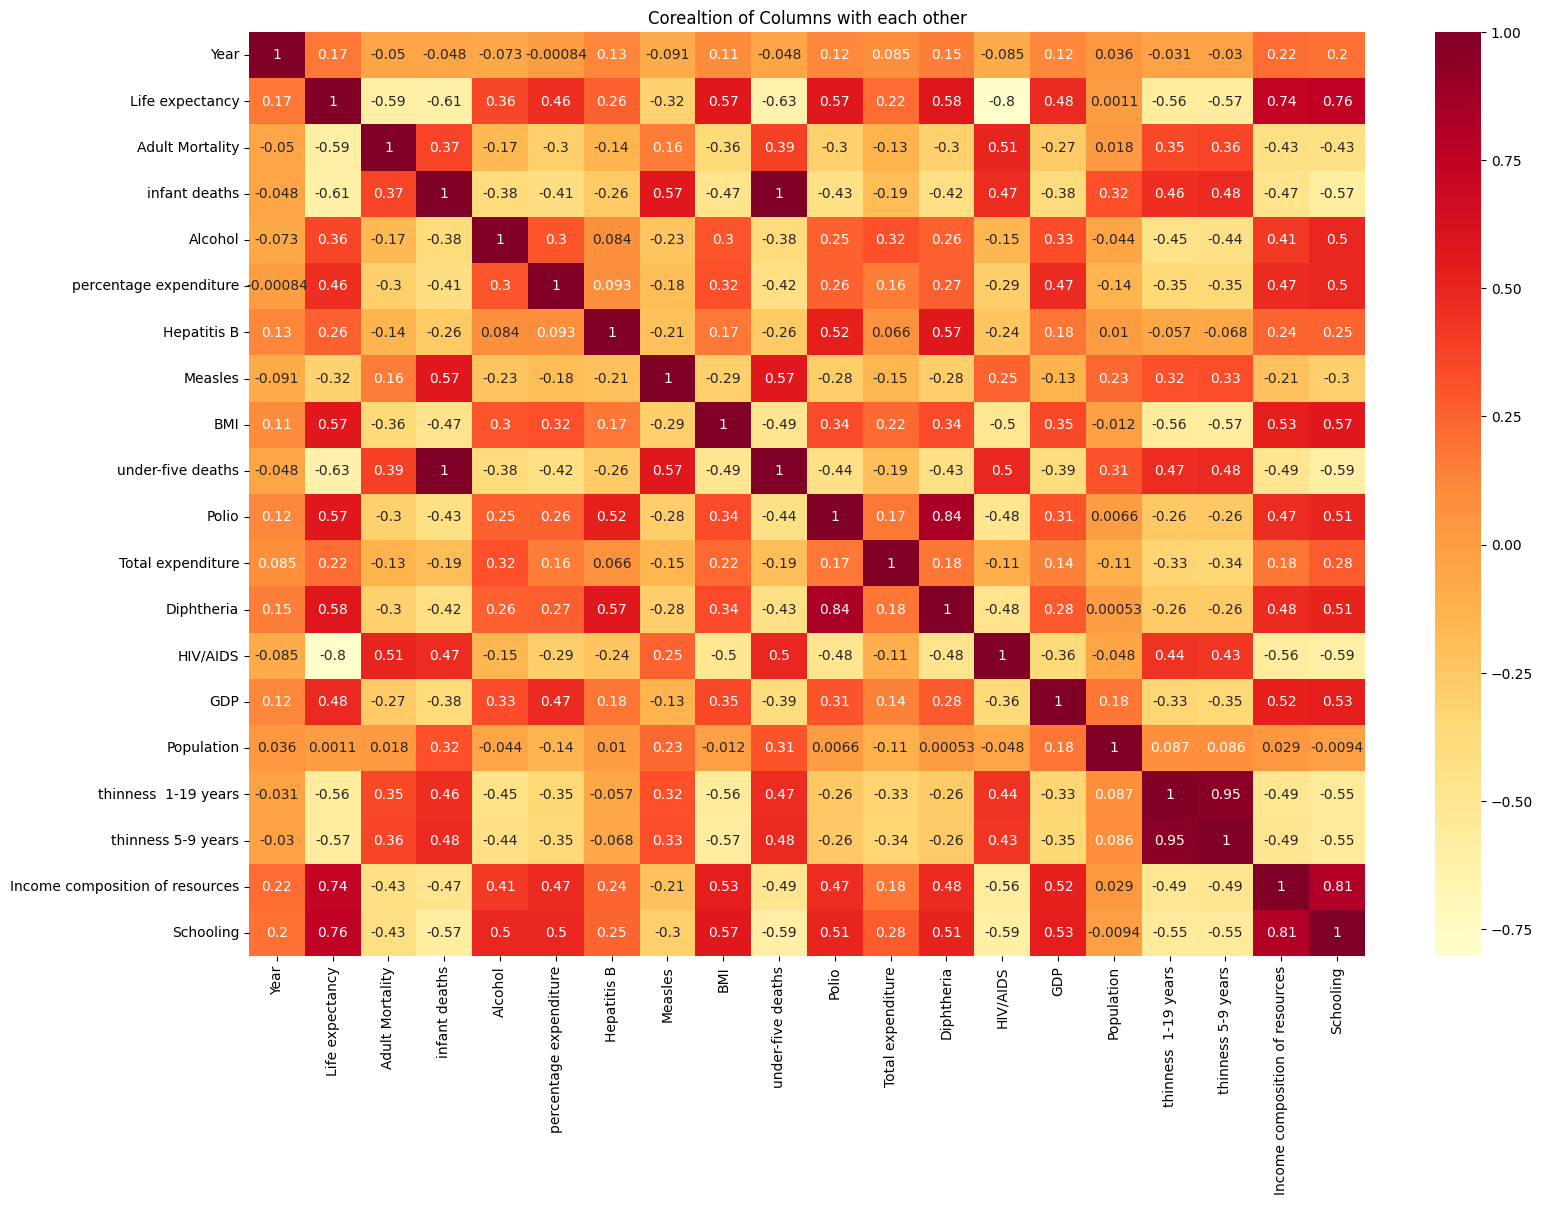

In [81]:
plt.figure(figsize=(18,12))

sns.heatmap(data_EDA.corr(numeric_only= True),annot=True,cmap='YlOrRd')
plt.title('Corealtion of Columns with each other')
plt.show()

**Drop Threshhold  ( > 0.75 )**


- Income Composition of Resources - Schooling  ->  0.82  , Life expectancy ->   ICOR[0.74]  , S[0.77]  


[Income Composition of Resources] ->  Drop


- Dephtheria - Polio  ->  0.85  , Life expectancy ->   D[0.57]  , P[0.77]  

{Similar Corealaion with ecery other column -> Same columns}

[Dephtheria] ->  Drop  


- GDP - Percentage Expenditure  ->  0.76  , Life expectancy ->   G[0.58]  , P[0.47]  



[Percentage Expdenditure] ->  Drop  


Kept the threshold of 0.75. Any column that has corealtion of 0.75 with each other one of them will be dropped.
I comapred the corelation of [Corealated columns] with the output Column and dropped that has lower Corelation.

In [82]:

data_EDA = data_EDA.drop(columns=['Income composition of resources','Diphtheria','percentage expenditure'])



In [83]:
data_EDA.sample(5)

Country  Year      Status  \
2764  United Kingdom of Great Britain and Northern I...  2013   Developed   
2047                                             Poland  2007   Developed   
10                                          Afghanistan  2005  Developing   
260                                              Belize  2011  Developing   
2170                                        Saint Lucia  2013  Developing   

      Life expectancy  Adult Mortality  infant deaths   Alcohol  Hepatitis B  \
2764             87.0         8.485281       1.386294  2.426571         73.6   
2047             75.3        12.000000       1.098612  2.476538         98.0   
10               57.3        17.058722       3.979682  0.019803         66.0   
260              69.4        13.711309       0.000000  2.033398         95.0   
2170             74.8        11.874342       0.000000  2.373044         99.0   

       Measles   BMI  under-five deaths  Polio  Total expenditure  HIV/AIDS  \
2764  6.781767  65.4           1.609438   95.0               9.34  0.095310   
2047  3.713572  56.6           1.386294   99.0               6.28  0.095310   
10    6.781767  14.2           4.189655   58.0               8.70  0.095310   
260   0.000000  47.8           0.000000   95.0               5.61  0.405465   
2170  0.000000  45.9           0.000000   99.0               7.85  0.095310   

             GDP   Population  thinness  1-19 years  thinness 5-9 years  \
2764  136.427044  3582.643633              0.587787            0.405465   
2047   33.560669   617.459310              1.163151            1.223775   
10      5.029327   507.738121              2.809403            2.818398   
260    67.203026   573.752560              1.504077            1.481605   
2170  152.158871  3582.643633              1.667707            1.667707   

      Schooling  
2764      12.94  
2047      15.00  
10         7.90  
260       12.40  
2170      13.10

**--------------             .    Final Dataset   .        ---------------------**

## Model Building



_We will now use the actual Data for Model building and perform all the Preprocessing steps that we analyzed above and worked best in this Dataset. This is done to avoid any Data Leakage. Every Preprocessing Step (Imputation, Scaling, Transformation etc) will be done separately on X_train and X_test_

In [84]:
data.sample(3)

Country  Year      Status  Life expectancy  \
998                            Germany  2011   Developed             85.0   
1433  Lao People's Democratic Republic  2008  Developing             62.6   
2920                            Zambia  2001  Developing             44.6   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
998              74.0              2    11.20              869.790735   
1433            228.0             10     5.10                0.000000   
2920            611.0             43     2.61               46.830275   

      Hepatitis B  Measles   BMI  under-five deaths  Polio  Total expenditure  \
998          88.0     1607   6.4                  3   94.0               1.93   
1433         61.0      174  16.7                 14    6.0               2.77   
2920          NaN    16997  17.1                 70   86.0               6.56   

      Diphtheria  HIV/AIDS          GDP  Population  thinness  1-19 years  \
998         95.0       0.1  4681.327960   8274983.0                   1.1   
1433        61.0       0.2          NaN         NaN                   9.6   
2920        85.0      18.6   378.273624   1824125.0                   7.4   

      thinness 5-9 years  Income composition of resources  Schooling  
998                  1.1                            0.912       16.8  
1433                 9.7                            0.518        9.2  
2920                 7.4                            0.424        9.8

In [85]:
data.isnull().sum().sum()

2563

In [86]:


# Dropping Null Values ( Non significant )

data.dropna(subset = ['Adult Mortality','Polio','Life expectancy','BMI','Diphtheria','thinness 5-9 years',
                          'thinness  1-19 years','thinness 5-9 years'
                          ], inplace=True)


In [87]:
data.isnull().sum().sum()

2311

In [88]:
data.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2888.000000      2888.000000      2888.000000    2888.000000   
mean   2007.515235        69.349377       163.357341      30.314751   
std       4.606938         9.495441       124.018934     118.891670   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.475000        73.000000       0.000000   
50%    2008.000000        72.200000       143.000000       3.000000   
75%    2012.000000        75.800000       225.000000      21.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2713.000000             2888.000000  2363.000000    2888.000000   
mean      4.643830              749.475611    81.022006    2442.514543   
std       4.053529             2003.090073    24.976423   11561.322467   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.930000                5.049462    77.000000       0.000000   
50%       3.810000               67.687008    92.000000      17.000000   
75%       7.800000              454.422430    97.000000     352.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2888.000000        2888.000000  2888.000000        2676.000000   
mean     38.221087          41.985803    82.672091           5.931626   
std      19.962630         161.743345    23.333655           2.482684   
min       1.000000           0.000000     3.000000           0.370000   
25%      19.300000           0.000000    78.000000           4.270000   
50%      43.250000           4.000000    93.000000           5.750000   
75%      56.100000          26.000000    97.000000           7.470000   
max      77.600000        2500.000000    99.000000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2888.000000  2888.000000    2453.000000  2.244000e+03   
mean     82.437673     1.749792    7576.831245  1.283534e+07   
std      23.648907     5.116551   14356.369723  6.155374e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     464.184650  1.939068e+05   
50%      93.000000     0.100000    1812.288374  1.383743e+06   
75%      97.000000     0.800000    6256.559260  7.399592e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2888.000000         2888.000000   
mean               4.850589            4.881337   
std                4.421403            4.510414   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.350000            3.400000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2728.000000  2728.000000  
mean                          0.632543    12.116312  
std                           0.206210     3.197199  
min                           0.000000     0.000000  
25%                           0.500000    10.200000  
50%                           0.679500    12.400000  
75%                           0.781000    14.300000  
max                           0.948000    20.700000

In [89]:

outlier_columns = data.select_dtypes(include='number').drop(columns=
                                                            ['BMI','Year','Life expectancy']).columns

# Removing Outliers from the Columns

for col in outlier_columns:
    data = IQR_outlier_Capping(data,col)

In [90]:
data.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2888.000000      2888.000000      2888.000000    2888.000000   
mean   2007.515235        69.349377       160.432479      13.134176   
std       4.606938         9.495441       114.960014      18.366645   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.475000        73.000000       0.000000   
50%    2008.000000        72.200000       143.000000       3.000000   
75%    2012.000000        75.800000       225.000000      21.000000   
max    2015.000000        89.000000       453.000000      52.500000   

           Alcohol  percentage expenditure  Hepatitis B      Measles  \
count  2713.000000             2888.000000  2363.000000  2888.000000   
mean      4.643830              291.619193    81.022006   228.990305   
std       4.053529              400.130060    24.976423   345.824982   
min       0.010000                0.000000     1.000000     0.000000   
25%       0.930000                5.049462    77.000000     0.000000   
50%       3.810000               67.687008    92.000000    17.000000   
75%       7.800000              454.422430    97.000000   352.250000   
max      17.870000             1128.481881    99.000000   880.625000   

               BMI  under-five deaths       Polio  Total expenditure  \
count  2888.000000        2888.000000  2888.00000        2676.000000   
mean     38.221087          16.974377    85.39491           5.931626   
std      19.962630          23.614002    15.80775           2.482684   
min       1.000000           0.000000    49.50000           0.370000   
25%      19.300000           0.000000    78.00000           4.270000   
50%      43.250000           4.000000    93.00000           5.750000   
75%      56.100000          26.000000    97.00000           7.470000   
max      77.600000          65.000000    99.00000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2888.000000  2888.000000    2453.000000  2.244000e+03   
mean     85.342105     0.533241    7576.831245  1.283534e+07   
std      15.783794     0.691292   14356.369723  6.155374e+07   
min      49.500000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     464.184650  1.939068e+05   
50%      93.000000     0.100000    1812.288374  1.383743e+06   
75%      97.000000     0.800000    6256.559260  7.399592e+06   
max      99.000000     1.850000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2888.000000         2888.000000   
mean               4.721745            4.737639   
std                3.973551            4.009365   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.350000            3.400000   
75%                7.200000            7.200000   
max               15.600000           15.750000   

       Income composition of resources    Schooling  
count                      2728.000000  2728.000000  
mean                          0.632543    12.116312  
std                           0.206210     3.197199  
min                           0.000000     0.000000  
25%                           0.500000    10.200000  
50%                           0.679500    12.400000  
75%                           0.781000    14.300000  
max                           0.948000    20.700000

Outliers have been removed

In [91]:
columns_to_transform = data.drop(columns=['Year','Hepatitis B','Polio','BMI','Total expenditure',
                                              'Diphtheria','Income composition of resources', 'Schooling',
                                              'Country', 'Status', 'Life expectancy']).columns

log_transform_cols = data[columns_to_transform].drop(columns=['percentage expenditure','Adult Mortality','GDP', 'Population']).columns
sqrt_transform_cols = data[['percentage expenditure','Adult Mortality','GDP', 'Population']].columns


# Applying Necessary Transformations:



data[log_transform_cols] = log_transformation(data[log_transform_cols],log_transform_cols)

data[sqrt_transform_cols] = sqrt_transformation(data[sqrt_transform_cols],sqrt_transform_cols)

In [92]:
data.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2888.000000      2888.000000      2888.000000    2888.000000   
mean   2007.515235        69.349377        11.714747       1.660730   
std       4.606938         9.495441         4.817180       1.466222   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.475000         8.544004       0.000000   
50%    2008.000000        72.200000        11.958261       1.386294   
75%    2012.000000        75.800000        15.000000       3.091042   
max    2015.000000        89.000000        21.283797       3.979682   

           Alcohol  percentage expenditure  Hepatitis B      Measles  \
count  2713.000000             2888.000000  2363.000000  2888.000000   
mean      1.405558               12.386193    81.022006     3.037396   
std       0.868181               11.757946    24.976423     2.715691   
min       0.009950                0.000000     1.000000     0.000000   
25%       0.657520                2.247093    77.000000     0.000000   
50%       1.570697                8.227211    92.000000     2.890372   
75%       2.174752               21.317170    97.000000     5.867175   
max       2.937573               33.592884    99.000000     6.781767   

               BMI  under-five deaths       Polio  Total expenditure  \
count  2888.000000        2888.000000  2888.00000        2676.000000   
mean     38.221087           1.810450    85.39491           5.931626   
std      19.962630           1.556780    15.80775           2.482684   
min       1.000000           0.000000    49.50000           0.370000   
25%      19.300000           0.000000    78.00000           4.270000   
50%      43.250000           1.609438    93.00000           5.750000   
75%      56.100000           3.295837    97.00000           7.470000   
max      77.600000           4.189655    99.00000          17.600000   

        Diphtheria     HIV/AIDS          GDP    Population  \
count  2888.000000  2888.000000  2453.000000   2244.000000   
mean     85.342105     0.345744    63.407922   2121.836490   
std      15.783794     0.380696    59.646601   2887.362203   
min      49.500000     0.095310     1.296669      5.830952   
25%      78.000000     0.095310    21.544945    440.348431   
50%      93.000000     0.095310    42.570980   1176.325945   
75%      97.000000     0.587787    79.098415   2720.218720   
max      99.000000     1.047319   345.214052  35970.255684   

       thinness  1-19 years  thinness 5-9 years  \
count           2888.000000         2888.000000   
mean               1.507747            1.505700   
std                0.697489            0.707266   
min                0.095310            0.095310   
25%                0.955511            0.916291   
50%                1.470110            1.481605   
75%                2.104134            2.104134   
max                2.809403            2.818398   

       Income composition of resources    Schooling  
count                      2728.000000  2728.000000  
mean                          0.632543    12.116312  
std                           0.206210     3.197199  
min                           0.000000     0.000000  
25%                           0.500000    10.200000  
50%                           0.679500    12.400000  
75%                           0.781000    14.300000  
max                           0.948000    20.700000

In [93]:

#  Droping Highly Corelated Features.

data = data.drop(columns=['Income composition of resources','Diphtheria','percentage expenditure'])



In [94]:
X = data.drop('Life expectancy', axis = 1)

y = data_EDA['Life expectancy']



In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)


X_train.shape, X_test.shape, y_train.shape, y_test.shape



((2310, 18), (578, 18), (2310,), (578,))

In [96]:
X_train.isnull().sum()

Country                   0
Year                      0
Status                    0
Adult Mortality           0
infant deaths             0
Alcohol                 144
Hepatitis B             433
Measles                   0
BMI                       0
under-five deaths         0
Polio                     0
Total expenditure       174
HIV/AIDS                  0
GDP                     345
Population              511
thinness  1-19 years      0
thinness 5-9 years        0
Schooling               123
dtype: int64

In [97]:
X_test.isnull().sum()

Country                   0
Year                      0
Status                    0
Adult Mortality           0
infant deaths             0
Alcohol                  31
Hepatitis B              92
Measles                   0
BMI                       0
under-five deaths         0
Polio                     0
Total expenditure        38
HIV/AIDS                  0
GDP                      90
Population              133
thinness  1-19 years      0
thinness 5-9 years        0
Schooling                37
dtype: int64

In [98]:

# For KNN Imputation.


num_cols_imp =  X.select_dtypes(include='number').columns

knn_impute = KNNImputer(n_neighbors=5)

X_train[num_cols_imp] = knn.fit_transform(X_train[num_cols_imp])
X_test[num_cols_imp] = knn.transform(X_test[num_cols_imp])



In [99]:
X_train.isnull().sum()

Country                 0
Year                    0
Status                  0
Adult Mortality         0
infant deaths           0
Alcohol                 0
Hepatitis B             0
Measles                 0
BMI                     0
under-five deaths       0
Polio                   0
Total expenditure       0
HIV/AIDS                0
GDP                     0
Population              0
thinness  1-19 years    0
thinness 5-9 years      0
Schooling               0
dtype: int64

In [100]:
X_test.isnull().sum()

Country                 0
Year                    0
Status                  0
Adult Mortality         0
infant deaths           0
Alcohol                 0
Hepatitis B             0
Measles                 0
BMI                     0
under-five deaths       0
Polio                   0
Total expenditure       0
HIV/AIDS                0
GDP                     0
Population              0
thinness  1-19 years    0
thinness 5-9 years      0
Schooling               0
dtype: int64

In [101]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler


ord_enc = OrdinalEncoder(categories=[['Developing','Developed']])
oh_enc = OneHotEncoder(drop='first', sparse_output=False, dtype='int32')
scaler = StandardScaler()


scale_cols = X.select_dtypes(include='number').columns



In [102]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[
    ('ordinal', ord_enc, ['Status']),
    ('onehot', oh_enc, ['Country']),
    ('scaler', scaler, scale_cols)
])

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

model = Pipeline(steps = [
    ('prep', preprocessing),
    ('lr', LinearRegression())
])


model.fit(X_train,y_train)

y_pred = model.predict(X_test)

y_pred_train = model.predict(X_train)



print("\n\nTraining Data Accuracy Score: ", r2_score(y_train,y_pred_train))
      
print("\n\nTesting Data Accuracy Score: ", r2_score(y_test,y_pred))




Training Data Accuracy Score:  0.961461812485281


Testing Data Accuracy Score:  0.9333720482651046


**No Overfitting Issue. Perfect Generalised Model... without HyperParameter Tuning**

Cross Validation is giving nan values. It may be because output variable contains lot of similar values...

In [ ]:
print(y.value_counts().sort_values(ascending=True))

Contains a lot of '1' values in a Dataset.